#Assignment-2

# Data Cleaning

` Data cleaning is a time consuming and unenjoyable task, yet it's a very important one. Keep in mind, "garbage in, garbage out".`

#### Feeding dirty data into a model will give us results that are meaningless.

### Objective:

1. Getting the data 
2. Cleaning the data 
3. Organizing the data - organize the cleaned data into a way that is easy to input into other algorithms

### Output :
#### cleaned and organized data in two standard text formats:

1. Corpus - a collection of text
2. Document-Term Matrix - word counts in matrix format

## Problem Statement

Look at transcripts of various comedians and note their similarities and differences and find if the stand up comedian of your choice has comedy style different than other comedian.


## Getting The Data

You can get the transcripts of some comedian from [Scraps From The Loft](http://scrapsfromtheloft.com). 

You can take help of IMDB and select only 10 or 20 comedian having highest rating.






### For example:

In [ ]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="ast-container").find_all('p')]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['https://scrapsfromtheloft.com/comedy/vir-das-outside-in-the-lockdown-special-transcript/',
        'https://scrapsfromtheloft.com/comedy/kevin-hart-zero-fks-given-2020-transcript/',
        'https://scrapsfromtheloft.com/comedy/kenny-sebastian-dont-be-that-guy-transcript/',
        'https://scrapsfromtheloft.com/comedy/eddie-murphy-raw-transcript/',
        'https://scrapsfromtheloft.com/comedy/dave-chappelle-sticks-stones-epilogue-punchline-transcript/',
        'https://scrapsfromtheloft.com/comedy/adam-sandler-100-fresh-transcript/',
        'https://scrapsfromtheloft.com/comedy/joe-rogan-strange-times-transcript/',
        'https://scrapsfromtheloft.com/comedy/louis-ck-snl-monologue-s38e06-2012-transcript/',
        'https://scrapsfromtheloft.com/comedy/chris-rock-tamborine-transcript/',
        'https://scrapsfromtheloft.com/comedy/jimmy-carr-funny-business-transcript/'
        ]

# Comedian names
comedians = ['vir', 'kevin', 'kenny', 'eddy', 'dave', 'adam', 'joe', 'louis', 'chris', 'jimmy']

In [ ]:
# # Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/comedy/vir-das-outside-in-the-lockdown-special-transcript/
https://scrapsfromtheloft.com/comedy/kevin-hart-zero-fks-given-2020-transcript/
https://scrapsfromtheloft.com/comedy/kenny-sebastian-dont-be-that-guy-transcript/
https://scrapsfromtheloft.com/comedy/eddie-murphy-raw-transcript/
https://scrapsfromtheloft.com/comedy/dave-chappelle-sticks-stones-epilogue-punchline-transcript/
https://scrapsfromtheloft.com/comedy/adam-sandler-100-fresh-transcript/
https://scrapsfromtheloft.com/comedy/joe-rogan-strange-times-transcript/
https://scrapsfromtheloft.com/comedy/louis-ck-snl-monologue-s38e06-2012-transcript/
https://scrapsfromtheloft.com/comedy/chris-rock-tamborine-transcript/
https://scrapsfromtheloft.com/comedy/jimmy-carr-funny-business-transcript/


In [ ]:
# # Pickle files for later use

# # Make a new directory to hold the text files
!mkdir transcripts

for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

In [ ]:
# Load pickled files
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [ ]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['vir', 'kevin', 'kenny', 'eddy', 'dave', 'adam', 'joe', 'louis', 'chris', 'jimmy'])

In [ ]:
# More checks
data['vir'][:2]

['[soft piano music playing]',
 '[Vir Das] What you’re about to watch wasn’t supposed to happen. It’s completely unscripted. It was totally unplanned. It’s just… a moment in time. When the world shut down, we decided to do 30 shows for charity, just to raise money for COVID relief. And every night, I’d ask people the same question. What’s the first thing you’re gonna do, the first thing, when this world reopens? Welcome to lockdown day. I don’t know what day it is. That’s the thing about the entire world going through the same thing at the same time. I guess it’s special. All right. What’s up! What’s up, everyone? Hello! Good evening, and welcome to what promises to be the strangest stand-up comedy gig that you and I have both ever been a part of. If you’re not using earphones, what I ask is that you get as close to the device as you possibly can so that I can hear you laugh. Because if I cannot hear you laugh, then it’s just me in a room talking to myself, worried that I’m going to di

## Cleaning The Data

When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as text pre-processing techniques.

With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - start simple and iterate.
### Assignment:
1. Perform the following data cleaning on transcripts:
i) Make text all lower case
ii) Remove punctuation
iii) Remove numerical values
iv) Remove common non-sensical text (/n)
v) Tokenize text
vi) Remove stop words

In [ ]:
# Let's take a look at our data again
next(iter(data.keys()))

'vir'

In [ ]:
# Notice that our dictionary is currently in key: comedian, value: list of text format
next(iter(data.values()))

['[soft piano music playing]',
 '[Vir Das] What you’re about to watch wasn’t supposed to happen. It’s completely unscripted. It was totally unplanned. It’s just… a moment in time. When the world shut down, we decided to do 30 shows for charity, just to raise money for COVID relief. And every night, I’d ask people the same question. What’s the first thing you’re gonna do, the first thing, when this world reopens? Welcome to lockdown day. I don’t know what day it is. That’s the thing about the entire world going through the same thing at the same time. I guess it’s special. All right. What’s up! What’s up, everyone? Hello! Good evening, and welcome to what promises to be the strangest stand-up comedy gig that you and I have both ever been a part of. If you’re not using earphones, what I ask is that you get as close to the device as you possibly can so that I can hear you laugh. Because if I cannot hear you laugh, then it’s just me in a room talking to myself, worried that I’m going to di

In [ ]:
# We are going to change this to key: comedian, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [ ]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [ ]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
adam,"[man] Okay, ready, and… Take your own cue, Adam. And action, Dan! [piano plays] ♪ It was the perfect day ♪\n♪ You had the sweetest smile ♪\n♪ You ..."
chris,"[indistinct overlapping chatter] [woman] Ladies and gentlemen, Chris Rock. [audience cheers and applauds] Yeah. Please. Oh, sit down. Sit yo asses..."
dave,Tacked onto the end of the Dave Chappelle’s Sticks and Stones is a secret 23-minute special called Epilogue: The Punchline. The hidden special con...
eddy,"After achieving fame with Saturday Night Live and Beverly Hills Cop, Eddie Murphy released a film version of one of his live stand-up performances..."
jimmy,"[classical music playing] [applauding and cheering] Wow! Good evening, London. You well? -[audience] Yes! -Fabulous. You are in very safe hands th..."
joe,"[indistinct chattering] [faint laughter] [audience cheering and applauding] Oh! What the fuck, Boston? Goddamn! Thank you. It’s good to be here. G..."
kenny,Make some noise for Kenny Sebastian. Oh my God. Thank you so much Mumbai. Thank you. Thank you. Really. How are you guys doing? Oh shit. Let’s do ...
kevin,"Streaming on Netflix from November 17, 2020 [Kenzo babbling] [Kevin] Yo. What’s up? I was looking all over the house for y’all. [Eniko] We’re ju..."
louis,Announcer: Ladies and gentlemen — Louis C.K.! Louis C.K.: Thank you! [he grabs a microphone handed to him] Thank you. Thank you very much. [into t...
vir,[soft piano music playing] [Vir Das] What you’re about to watch wasn’t supposed to happen. It’s completely unscripted. It was totally unplanned. I...


In [ ]:
# Let's take a look at the transcript for Eddy Murphy
data_df.transcript.loc['eddy']

'After achieving fame with Saturday Night Live and Beverly Hills Cop, Eddie Murphy released a film version of one of his live stand-up performances. He mainly focuses on the topics of divorce and relations between the sexes, but also goes into some of the problems he’s encountered because of fame, including offended listeners and fans who continually greet him with his unprintable catch phrases. \xa0 – Show me that little dance you-all be doing.\n– I told y’all to stop running in here.\nYes, ma’am. I’m gonna smack one of you now, you hear? Them pants cost $3.98, baby, you hear? See that chocolate cake I bought? The chocolate cake that was on the counter? – Yeah. – Well, check Cousin Cecil’s pockets. He probably got it in there with the turkey leg and the sweet potato pie. Hey, little brother. Show me that little dance y’all be doing. Get down, Lester, you is talking! You move like you’re 21 . That dance ain’t new. lt ain’t nothing but the old shuffle-butt. Well, show me that move. Oh, 

In [ ]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
adam,okay ready and… take your own cue adam and action dan ♪ it was the perfect day ♪\n♪ you had the sweetest smile ♪\n♪ you were my only way ♪\n♪ ye...
chris,ladies and gentlemen chris rock yeah please oh sit down sit yo asses down please let me get on with the show it’s nice to be here brooklyn here...
dave,tacked onto the end of the dave chappelle’s sticks and stones is a secret special called epilogue the punchline the hidden special consists of ch...
eddy,after achieving fame with saturday night live and beverly hills cop eddie murphy released a film version of one of his live standup performances h...
jimmy,wow good evening london you well yes fabulous you are in very safe hands this evening i’ve been doing comedy now for uh… money and sex it’s goi...
joe,oh what the fuck boston goddamn thank you it’s good to be here good to be back fuck i love it goddamn it good to see happy people… having a goo...
kenny,make some noise for kenny sebastian oh my god thank you so much mumbai thank you thank you really how are you guys doing oh shit let’s do this com...
kevin,streaming on netflix from november yo what’s up i was looking all over the house for y’all we’re just chilling about to go downstairs get s...
louis,announcer ladies and gentlemen — louis ck louis ck thank you thank you thank you very much thank you very much you guys uh — great to be here we...
vir,what you’re about to watch wasn’t supposed to happen it’s completely unscripted it was totally unplanned it’s just… a moment in time when the wo...


In [ ]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation, musical symbols and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('[♪]', '', text)
    text = re.sub('[—]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [ ]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
adam,okay ready and take your own cue adam and action dan it was the perfect day you had the sweetest smile you were my only way yeah we were doi...
chris,ladies and gentlemen chris rock yeah please oh sit down sit yo asses down please let me get on with the show its nice to be here brooklyn heres...
dave,tacked onto the end of the dave chappelles sticks and stones is a secret special called epilogue the punchline the hidden special consists of cha...
eddy,after achieving fame with saturday night live and beverly hills cop eddie murphy released a film version of one of his live standup performances h...
jimmy,wow good evening london you well yes fabulous you are in very safe hands this evening ive been doing comedy now for uh money and sex its going ...
joe,oh what the fuck boston goddamn thank you its good to be here good to be back fuck i love it goddamn it good to see happy people having a good ...
kenny,make some noise for kenny sebastian oh my god thank you so much mumbai thank you thank you really how are you guys doing oh shit lets do this come...
kevin,streaming on netflix from november yo whats up i was looking all over the house for yall were just chilling about to go downstairs get some...
louis,announcer ladies and gentlemen louis ck louis ck thank you thank you thank you very much thank you very much you guys uh great to be here were...
vir,what youre about to watch wasnt supposed to happen its completely unscripted it was totally unplanned its just a moment in time when the world s...


In [ ]:
data_clean.transcript.loc['louis']

'announcer ladies and gentlemen  louis ck louis ck thank you  thank you thank you very much  thank you very much you guys uh  great to be here were in new york uh there was a hurricane but we are still here the citys standing  a city that can really take a punch and uh today they turned the power back on which is great because uh now we can go back to using wayyyyy too much electricity like insaaaaane amounts of eletricity we went from zero electricity to a criminal amount of electricity like last night everybody had a candle like  ebenezerrr and today i had like five hair dryers going  whoooooo i turned on the heat and the air conditioning and like let them fight in the apartment i uh  i was stuck at the airport because of this mess i was in the airport and this old lady fell down  okay thats funny fine shes dead  i hope youre okay with that just kidding shes not well she might be dead anybody who im not looking at might dead but anyway  this old lady she falls down and shes like arrg

## Organizing The Data

### Assignment:
1. Organized data in two standard text formats:
   a) Corpus - corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.
   b) Document-Term Matrix - word counts in matrix format

### Corpus: Example

A corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.

In [ ]:
# Let's take a look at our dataframe
data_df

,transcript
adam,"[man] Okay, ready, and… Take your own cue, Adam. And action, Dan! [piano plays] ♪ It was the perfect day ♪\n♪ You had the sweetest smile ♪\n♪ You ..."
chris,"[indistinct overlapping chatter] [woman] Ladies and gentlemen, Chris Rock. [audience cheers and applauds] Yeah. Please. Oh, sit down. Sit yo asses..."
dave,Tacked onto the end of the Dave Chappelle’s Sticks and Stones is a secret 23-minute special called Epilogue: The Punchline. The hidden special con...
eddy,"After achieving fame with Saturday Night Live and Beverly Hills Cop, Eddie Murphy released a film version of one of his live stand-up performances..."
jimmy,"[classical music playing] [applauding and cheering] Wow! Good evening, London. You well? -[audience] Yes! -Fabulous. You are in very safe hands th..."
joe,"[indistinct chattering] [faint laughter] [audience cheering and applauding] Oh! What the fuck, Boston? Goddamn! Thank you. It’s good to be here. G..."
kenny,Make some noise for Kenny Sebastian. Oh my God. Thank you so much Mumbai. Thank you. Thank you. Really. How are you guys doing? Oh shit. Let’s do ...
kevin,"Streaming on Netflix from November 17, 2020 [Kenzo babbling] [Kevin] Yo. What’s up? I was looking all over the house for y’all. [Eniko] We’re ju..."
louis,Announcer: Ladies and gentlemen — Louis C.K.! Louis C.K.: Thank you! [he grabs a microphone handed to him] Thank you. Thank you very much. [into t...
vir,[soft piano music playing] [Vir Das] What you’re about to watch wasn’t supposed to happen. It’s completely unscripted. It was totally unplanned. I...


In [ ]:
# Let's add the comedians' full names as well
full_names = ['Vir Das', 'Kevin Hart', 'Kenny Sebastian', 'Eddy Murphy', 'Dave Chappelle', 'Adam Sandler', 'Joe Rogan', 'Louis C.K', 
              'Chris Rock', 'Jimmy Carr']

data_df['full_name'] = full_names
data_df

,transcript,full_name
adam,"[man] Okay, ready, and… Take your own cue, Adam. And action, Dan! [piano plays] ♪ It was the perfect day ♪\n♪ You had the sweetest smile ♪\n♪ You ...",Vir Das
chris,"[indistinct overlapping chatter] [woman] Ladies and gentlemen, Chris Rock. [audience cheers and applauds] Yeah. Please. Oh, sit down. Sit yo asses...",Kevin Hart
dave,Tacked onto the end of the Dave Chappelle’s Sticks and Stones is a secret 23-minute special called Epilogue: The Punchline. The hidden special con...,Kenny Sebastian
eddy,"After achieving fame with Saturday Night Live and Beverly Hills Cop, Eddie Murphy released a film version of one of his live stand-up performances...",Eddy Murphy
jimmy,"[classical music playing] [applauding and cheering] Wow! Good evening, London. You well? -[audience] Yes! -Fabulous. You are in very safe hands th...",Dave Chappelle
joe,"[indistinct chattering] [faint laughter] [audience cheering and applauding] Oh! What the fuck, Boston? Goddamn! Thank you. It’s good to be here. G...",Adam Sandler
kenny,Make some noise for Kenny Sebastian. Oh my God. Thank you so much Mumbai. Thank you. Thank you. Really. How are you guys doing? Oh shit. Let’s do ...,Joe Rogan
kevin,"Streaming on Netflix from November 17, 2020 [Kenzo babbling] [Kevin] Yo. What’s up? I was looking all over the house for y’all. [Eniko] We’re ju...",Louis C.K
louis,Announcer: Ladies and gentlemen — Louis C.K.! Louis C.K.: Thank you! [he grabs a microphone handed to him] Thank you. Thank you very much. [into t...,Chris Rock
vir,[soft piano music playing] [Vir Das] What you’re about to watch wasn’t supposed to happen. It’s completely unscripted. It was totally unplanned. I...,Jimmy Carr


In [ ]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

### Document-Term Matrix: Example

For many of the techniques we'll be using in future assignment, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's ` CountVectorizer `, where every row will represent a different document and every column will represent a different word.

In addition, with ` CountVectorizer `, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [ ]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaaaa,aah,abdomen,abdullahs,abide,abilities,ability,able,abortion,absolutely,...,zombies,zone,zoo,zoom,zucker,zuckerberg,zuckerfuck,zuckerfucker,zuckermother,zuckzucker
adam,0,0,0,0,0,0,0,1,0,3,...,0,0,2,0,0,0,0,0,0,0
chris,0,0,0,0,0,0,0,1,0,3,...,0,0,0,0,1,1,1,1,2,1
dave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
eddy,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jimmy,0,0,0,0,0,0,3,2,1,0,...,0,1,0,0,0,0,0,0,0,0
joe,0,6,1,0,0,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
kenny,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kevin,0,3,0,0,0,0,0,2,0,2,...,1,1,0,0,0,0,0,0,0,0
louis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vir,0,0,0,0,0,1,0,2,0,4,...,0,0,0,6,0,0,0,0,0,0


In [ ]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [ ]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

## Additional Assignments:

1. Can you add an additional regular expression to the clean_text_round2 function to further clean the text?
2. Play around with CountVectorizer's parameters. What is ngram_range? What is min_df and max_df?

In [ ]:
#PART 1.
# text = re.sub('[♪]', '', text)
# text = re.sub('[—]', '', text)

#PART 2.
# The ngram_range parameter in CountVectorizer specifies the
#  range of n-grams to be extracted from the input text.
# For eg: ngram_range(1,2) will extract unigrams and bigrams

# The min_df and max_df parameters in CountVectorizer control
#  the minimum and maximum number of documents in which a term must
#   appear in order to be included in the feature matrix.


# Assignment-3

# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

In [ ]:
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,adam,chris,dave,eddy,jimmy,joe,kenny,kevin,louis,vir
aaaaaa,0,0,0,0,0,0,2,0,0,0
aah,0,0,0,1,0,6,0,3,0,0
abdomen,0,0,0,0,0,1,0,0,0,0
abdullahs,0,0,0,1,0,0,0,0,0,0
abide,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'adam': [('like', 144),
  ('im', 117),
  ('fucking', 115),
  ('know', 80),
  ('got', 71),
  ('yeah', 65),
  ('just', 61),
  ('right', 48),
  ('phone', 44),
  ('dont', 43),
  ('oh', 42),
  ('fuck', 42),
  ('thats', 38),
  ('guy', 36),
  ('youre', 36),
  ('kids', 35),
  ('okay', 35),
  ('say', 34),
  ('shit', 33),
  ('boy', 30),
  ('ears', 29),
  ('good', 28),
  ('slow', 28),
  ('man', 27),
  ('thank', 25),
  ('need', 25),
  ('goes', 25),
  ('said', 24),
  ('mitzvah', 24),
  ('bar', 24)],
 'chris': [('like', 109),
  ('man', 90),
  ('know', 77),
  ('right', 76),
  ('thats', 70),
  ('im', 69),
  ('shit', 54),
  ('got', 49),
  ('fuck', 44),
  ('just', 44),
  ('ok', 43),
  ('youre', 43),
  ('god', 42),
  ('fucking', 38),
  ('dont', 38),
  ('kids', 38),
  ('people', 33),
  ('think', 28),
  ('need', 24),
  ('gotta', 24),
  ('black', 23),
  ('tambourine', 22),
  ('oh', 21),
  ('house', 21),
  ('good', 21),
  ('motherfucker', 20),
  ('white', 20),
  ('gonna', 20),
  ('thing', 19),
  ('cause', 1

In [ ]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('-------')

adam
like, im, fucking, know, got, yeah, just, right, phone, dont, oh, fuck, thats, guy
-------
chris
like, man, know, right, thats, im, shit, got, fuck, just, ok, youre, god, fucking
-------
dave
like, im, say, just, said, know, fuck, room, jokes, dont, uh, right, sitting, going
-------
eddy
like, dont, shit, im, know, fuck, got, gonna, say, thats, man, right, said, just
-------
jimmy
youre, like, im, got, dont, just, said, thats, think, say, fucking, know, joke, ive
-------
joe
like, fucking, just, dont, know, thats, fuck, youre, im, people, right, got, want, shit
-------
kenny
like, im, just, guys, bro, dont, know, hey, yeah, nice, okay, thats, come, mom
-------
kevin
im, dont, fcking, said, got, know, thats, fck, like, man, just, right, shit, gonna
-------
louis
like, old, lady, dont, im, know, shes, just, ladies, got, uh, really, youre, thank
-------
vir
like, im, know, just, thats, er, youre, right, dont, yeah, gonna, okay, fckin, thing
-------


In [ ]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'im',
 'fucking',
 'know',
 'got',
 'yeah',
 'just',
 'right',
 'phone',
 'dont',
 'oh',
 'fuck',
 'thats',
 'guy',
 'youre',
 'kids',
 'okay',
 'say',
 'shit',
 'boy',
 'ears',
 'good',
 'slow',
 'man',
 'thank',
 'need',
 'goes',
 'said',
 'mitzvah',
 'bar',
 'like',
 'man',
 'know',
 'right',
 'thats',
 'im',
 'shit',
 'got',
 'fuck',
 'just',
 'ok',
 'youre',
 'god',
 'fucking',
 'dont',
 'kids',
 'people',
 'think',
 'need',
 'gotta',
 'black',
 'tambourine',
 'oh',
 'house',
 'good',
 'motherfucker',
 'white',
 'gonna',
 'thing',
 'cause',
 'like',
 'im',
 'say',
 'just',
 'said',
 'know',
 'fuck',
 'room',
 'jokes',
 'dont',
 'uh',
 'right',
 'sitting',
 'going',
 'goes',
 'says',
 'dave',
 'time',
 'hes',
 'obama',
 'thats',
 'fucking',
 'daphne',
 'thought',
 'tell',
 'question',
 'doing',
 'want',
 'did',
 'comedians',
 'like',
 'dont',
 'shit',
 'im',
 'know',
 'fuck',
 'got',
 'gonna',
 'say',
 'thats',
 'man',
 'right',
 'said',
 'just',
 'eddie',
 'ass',
 'yall'

In [ ]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 10),
 ('im', 10),
 ('know', 10),
 ('just', 10),
 ('dont', 10),
 ('thats', 10),
 ('right', 9),
 ('got', 8),
 ('oh', 7),
 ('youre', 7),
 ('shit', 7),
 ('fucking', 6),
 ('fuck', 6),
 ('good', 6),
 ('people', 6),
 ('going', 6),
 ('okay', 5),
 ('say', 5),
 ('said', 5),
 ('gonna', 5),
 ('yeah', 4),
 ('man', 4),
 ('think', 4),
 ('house', 4),
 ('thing', 4),
 ('want', 4),
 ('really', 4),
 ('kids', 3),
 ('cause', 3),
 ('time', 3),
 ('make', 3),
 ('come', 3),
 ('phone', 2),
 ('guy', 2),
 ('thank', 2),
 ('need', 2),
 ('goes', 2),
 ('gotta', 2),
 ('motherfucker', 2),
 ('uh', 2),
 ('hes', 2),
 ('tell', 2),
 ('did', 2),
 ('woman', 2),
 ('aint', 2),
 ('women', 2),
 ('hey', 2),
 ('shes', 2),
 ('theyre', 2),
 ('went', 2),
 ('whats', 2),
 ('theres', 2),
 ('guys', 2),
 ('fck', 2),
 ('fckin', 2),
 ('great', 2),
 ('boy', 1),
 ('ears', 1),
 ('slow', 1),
 ('mitzvah', 1),
 ('bar', 1),
 ('ok', 1),
 ('god', 1),
 ('black', 1),
 ('tambourine', 1),
 ('white', 1),
 ('room', 1),
 ('jokes', 1),
 ('sitting', 

In [ ]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'got',
 'oh',
 'youre',
 'shit']

In [ ]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white" , colormap="Dark2",
               max_font_size=150, random_state=42)

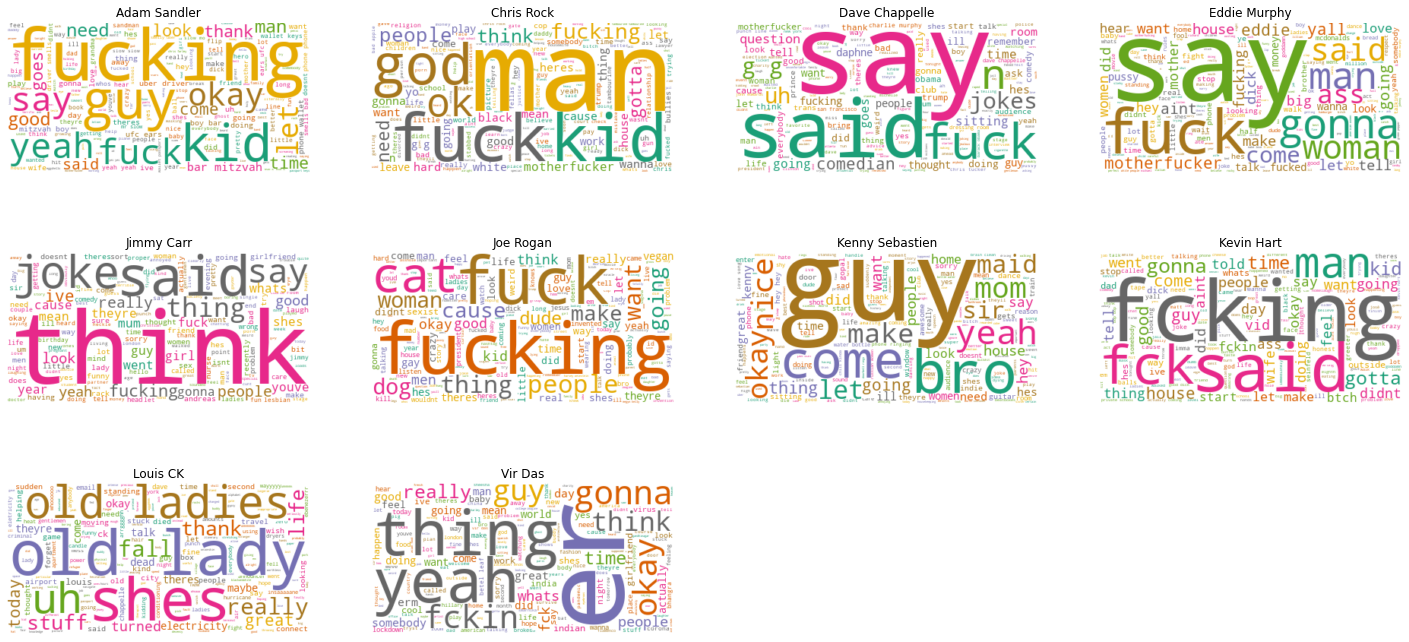

In [ ]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [25,12]

full_names = ['Adam Sandler', 'Chris Rock', 'Dave Chappelle', 'Eddie Murphy', 'Jimmy Carr', 'Joe Rogan', 'Kenny Sebastien'
, 'Kevin Hart', 'Louis CK', 'Vir Das']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Findings

* Louis CK and Kenny Sebastien are the only comedians who don't use swearing too much.
* Most of the comedians use the F-word.

## Number of Words

### Analysis

In [ ]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
8,Louis CK,299
2,Dave Chappelle,649
1,Chris Rock,1076
6,Kenny Sebastien,1092
9,Vir Das,1259
5,Joe Rogan,1331
7,Kevin Hart,1377
0,Adam Sandler,1419
3,Eddie Murphy,1485
4,Jimmy Carr,1603


In [ ]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [73, 98, 65, 93, 62, 63, 60, 69, 7, 50]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute', ascending = False)
data_wpm_sort

TypeError: ignored

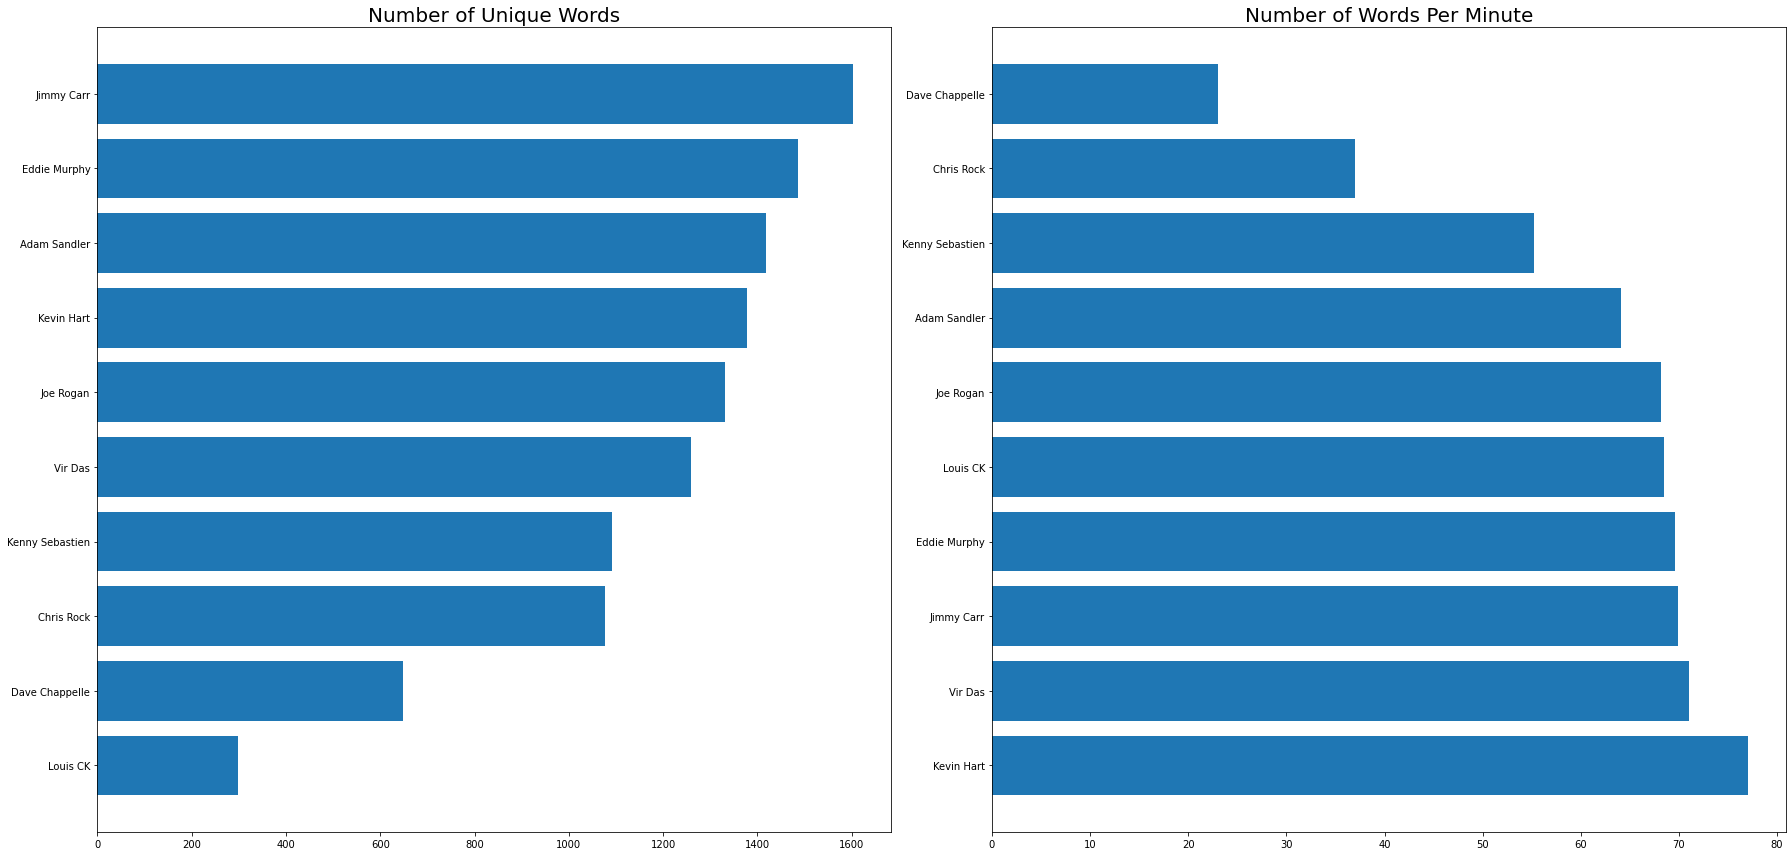

In [ ]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Findings

* **Vocabulary**
   * Jimmy Carr (British comedy) and Eddie Murphy (black comedy) use a lot of words in their comedy
   * Louis C.K. (self-depricating comedy) and Dave Chappelle (satirical comedy) have a smaller vocabulary. In Louis CK's case it could be anomaly due to comparatively lesser runtime of his standup special.


* **Talking Speed**
   * Kevin hart (slapstick comedy) talks very fast compared to other comedians.
   * Dave Chappelle (satirical comedy) talks pretty slowly comparitively.
   
Joe Rogan is somewhere in the middle in both cases. Nothing too interesting here.

## Amount of Profanity

### Analysis

In [ ]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 10),
 ('im', 10),
 ('know', 10),
 ('just', 10),
 ('dont', 10),
 ('thats', 10),
 ('right', 9),
 ('got', 8),
 ('oh', 7),
 ('youre', 7),
 ('shit', 7),
 ('fucking', 6),
 ('fuck', 6),
 ('good', 6),
 ('people', 6),
 ('going', 6),
 ('okay', 5),
 ('say', 5),
 ('said', 5),
 ('gonna', 5),
 ('yeah', 4),
 ('man', 4),
 ('think', 4),
 ('house', 4),
 ('thing', 4),
 ('want', 4),
 ('really', 4),
 ('kids', 3),
 ('cause', 3),
 ('time', 3),
 ('make', 3),
 ('come', 3),
 ('phone', 2),
 ('guy', 2),
 ('thank', 2),
 ('need', 2),
 ('goes', 2),
 ('gotta', 2),
 ('motherfucker', 2),
 ('uh', 2),
 ('hes', 2),
 ('tell', 2),
 ('did', 2),
 ('woman', 2),
 ('aint', 2),
 ('women', 2),
 ('hey', 2),
 ('shes', 2),
 ('theyre', 2),
 ('went', 2),
 ('whats', 2),
 ('theres', 2),
 ('guys', 2),
 ('fck', 2),
 ('fckin', 2),
 ('great', 2),
 ('boy', 1),
 ('ears', 1),
 ('slow', 1),
 ('mitzvah', 1),
 ('bar', 1),
 ('ok', 1),
 ('god', 1),
 ('black', 1),
 ('tambourine', 1),
 ('white', 1),
 ('room', 1),
 ('jokes', 1),
 ('sitting', 

In [ ]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit','fcking', 'fckin','fck','fucked', 'shittin', 'bullshit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck + data_bad_words.fcking + data_bad_words.fckin 
                            + data_bad_words.fck + data_bad_words.fucked, data_bad_words.shit + data_bad_words.shittin + data_bad_words.bullshit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
adam,164,33
chris,91,54
dave,26,5
eddy,139,100
jimmy,52,3
joe,134,35
kenny,0,26
kevin,187,49
louis,0,0
vir,46,20


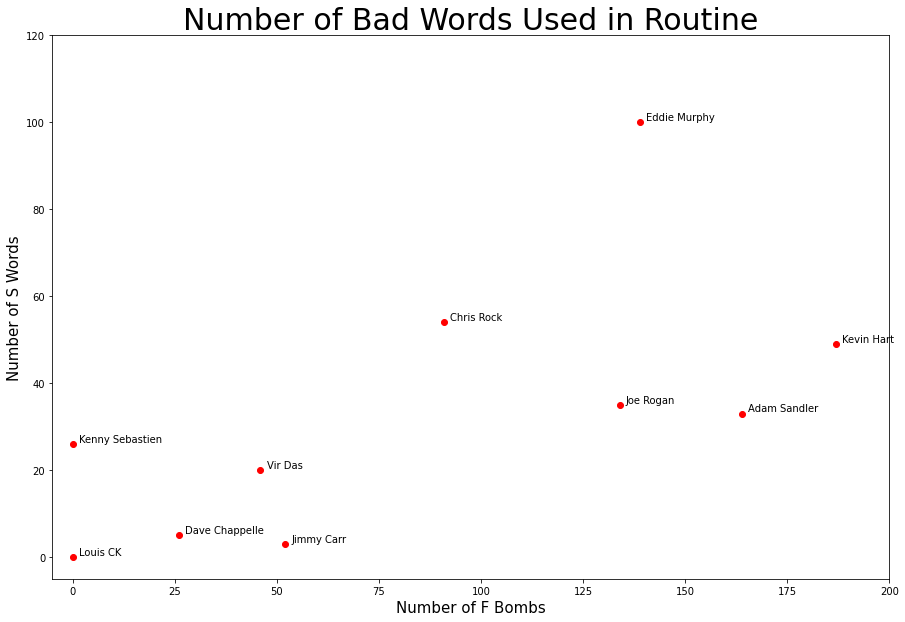

In [ ]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [15, 10]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='red')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 200) 
    plt.ylim(-5, 120)
    
plt.title('Number of Bad Words Used in Routine', fontsize=30)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Findings

* **Averaging 2 F-Bombs Per Minute!** - Eddy Murphy, Adam Sandler and Kevin Hart have huge amount of swearing in their comedy. So, their comedy can be regarded as uncomfortable and **non-Family-Friendly**.
* **Clean Humor** - Louis CK, Kenny Sebastien have very less swearing, almost negliligible and therefore their humor can be considered as **clean**. 

## Side Note

What was our goal for the EDA portion of our journey? **To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.

**Alice's data science (and life) motto: Let go of perfectionism!**

## Additional Exercises

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

In [ ]:
# Let's isolate different set of bad words other than F-words and S-words
data_bad_words_2 = data.transpose()[['ass','dick','asshole','pussy','sex','bitch','sexy','btch','suck','motherfucker','motherfcker','motherfucking',
                                   ]]
data_profanity_2 = pd.concat([ data_bad_words_2.asshole + data_bad_words_2.bitch + data_bad_words_2.btch 
                            + data_bad_words_2.motherfucker + data_bad_words_2.motherfcker + data_bad_words_2.motherfucking 
                            , data_bad_words_2.dick + data_bad_words_2.pussy 
                            + data_bad_words_2.sexy + data_bad_words_2.suck + data_bad_words_2.ass ], axis=1)
data_profanity_2.columns = ['abuse_word', 'sex_word']
data_profanity_2

,abuse_word,sex_word
adam,8,22
chris,29,22
dave,7,4
eddy,75,120
jimmy,1,6
joe,13,14
kenny,8,1
kevin,17,48
louis,0,0
vir,3,4


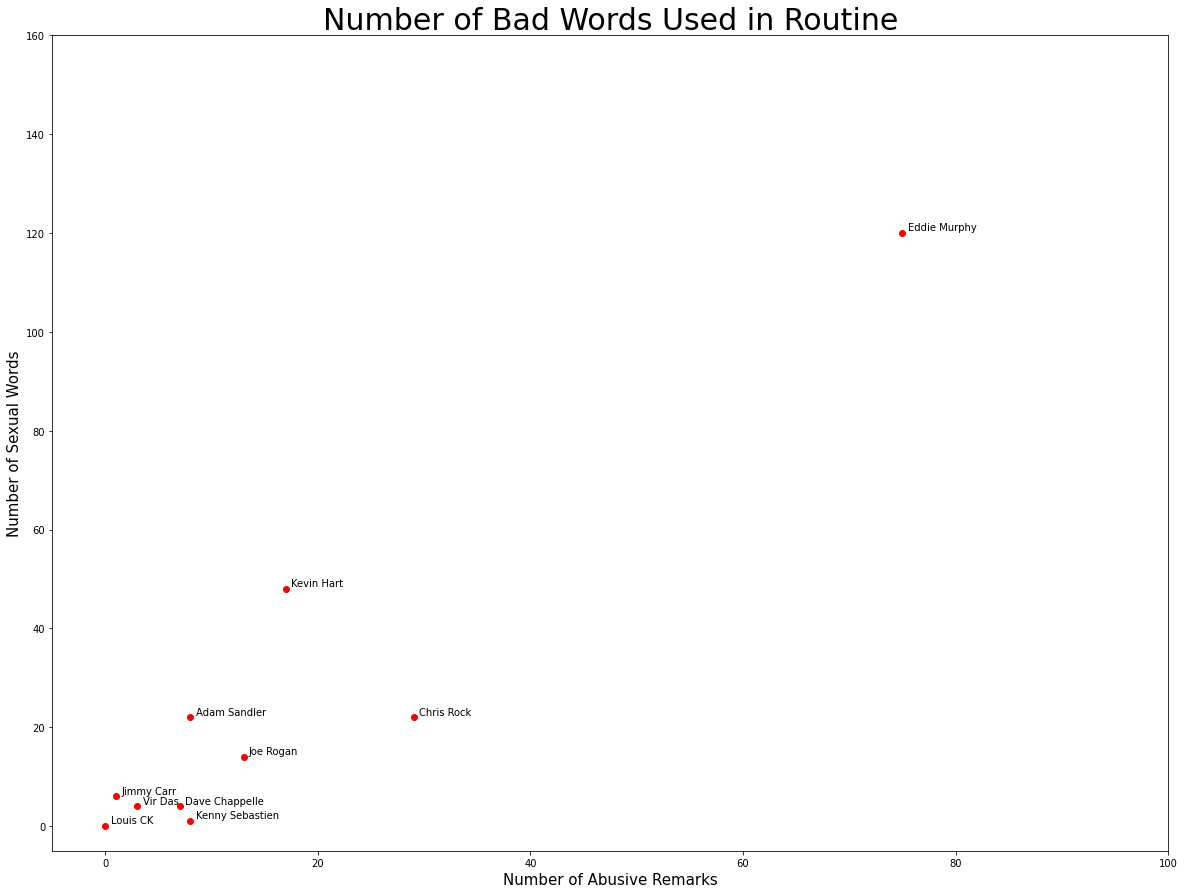

In [ ]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [20, 15]

for i, comedian in enumerate(data_profanity_2.index):
    x = data_profanity_2.abuse_word.loc[comedian]
    y = data_profanity_2.sex_word.loc[comedian]
    plt.scatter(x, y, color='red')
    plt.text(x+0.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 100) 
    plt.ylim(-5, 160)
    
plt.title('Number of Bad Words Used in Routine', fontsize=30)
plt.xlabel('Number of Abusive Remarks', fontsize=15)
plt.ylabel('Number of Sexual Words', fontsize=15)

plt.show() 

## Findings

* Eddie Murphy uses way more abusive as well as sexual words in his comedy than any other comedian. 
* Louis CK has used negligible amount of swearing or any other sexual remarks in his comedy. His comedy can be considered clean even in this aspect.


# Assignment-4

# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [ ]:
data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
adam,"[man] Okay, ready, and… Take your own cue, Adam. And action, Dan! [piano plays] ♪ It was the perfect day ♪\n♪ You had the sweetest smile ♪\n♪ You ...",Vir Das
chris,"[indistinct overlapping chatter] [woman] Ladies and gentlemen, Chris Rock. [audience cheers and applauds] Yeah. Please. Oh, sit down. Sit yo asses...",Kevin Hart
dave,Tacked onto the end of the Dave Chappelle’s Sticks and Stones is a secret 23-minute special called Epilogue: The Punchline. The hidden special con...,Kenny Sebastian
eddy,"After achieving fame with Saturday Night Live and Beverly Hills Cop, Eddie Murphy released a film version of one of his live stand-up performances...",Eddy Murphy
jimmy,"[classical music playing] [applauding and cheering] Wow! Good evening, London. You well? -[audience] Yes! -Fabulous. You are in very safe hands th...",Dave Chappelle
joe,"[indistinct chattering] [faint laughter] [audience cheering and applauding] Oh! What the fuck, Boston? Goddamn! Thank you. It’s good to be here. G...",Adam Sandler
kenny,Make some noise for Kenny Sebastian. Oh my God. Thank you so much Mumbai. Thank you. Thank you. Really. How are you guys doing? Oh shit. Let’s do ...,Joe Rogan
kevin,"Streaming on Netflix from November 17, 2020 [Kenzo babbling] [Kevin] Yo. What’s up? I was looking all over the house for y’all. [Eniko] We’re ju...",Louis C.K
louis,Announcer: Ladies and gentlemen — Louis C.K.! Louis C.K.: Thank you! [he grabs a microphone handed to him] Thank you. Thank you very much. [into t...,Chris Rock
vir,[soft piano music playing] [Vir Das] What you’re about to watch wasn’t supposed to happen. It’s completely unscripted. It was totally unplanned. I...,Jimmy Carr


In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
adam,"[man] Okay, ready, and… Take your own cue, Adam. And action, Dan! [piano plays] ♪ It was the perfect day ♪\n♪ You had the sweetest smile ♪\n♪ You ...",Vir Das,0.000659,0.548614
chris,"[indistinct overlapping chatter] [woman] Ladies and gentlemen, Chris Rock. [audience cheers and applauds] Yeah. Please. Oh, sit down. Sit yo asses...",Kevin Hart,0.017613,0.549621
dave,Tacked onto the end of the Dave Chappelle’s Sticks and Stones is a secret 23-minute special called Epilogue: The Punchline. The hidden special con...,Kenny Sebastian,0.012565,0.508051
eddy,"After achieving fame with Saturday Night Live and Beverly Hills Cop, Eddie Murphy released a film version of one of his live stand-up performances...",Eddy Murphy,-0.015016,0.538857
jimmy,"[classical music playing] [applauding and cheering] Wow! Good evening, London. You well? -[audience] Yes! -Fabulous. You are in very safe hands th...",Dave Chappelle,0.019854,0.520745
joe,"[indistinct chattering] [faint laughter] [audience cheering and applauding] Oh! What the fuck, Boston? Goddamn! Thank you. It’s good to be here. G...",Adam Sandler,-0.026283,0.592575
kenny,Make some noise for Kenny Sebastian. Oh my God. Thank you so much Mumbai. Thank you. Thank you. Really. How are you guys doing? Oh shit. Let’s do ...,Joe Rogan,0.133179,0.574780
kevin,"Streaming on Netflix from November 17, 2020 [Kenzo babbling] [Kevin] Yo. What’s up? I was looking all over the house for y’all. [Eniko] We’re ju...",Louis C.K,0.051130,0.512896
louis,Announcer: Ladies and gentlemen — Louis C.K.! Louis C.K.: Thank you! [he grabs a microphone handed to him] Thank you. Thank you very much. [into t...,Chris Rock,0.069367,0.418358
vir,[soft piano music playing] [Vir Das] What you’re about to watch wasn’t supposed to happen. It’s completely unscripted. It was totally unplanned. I...,Jimmy Carr,0.143202,0.494408


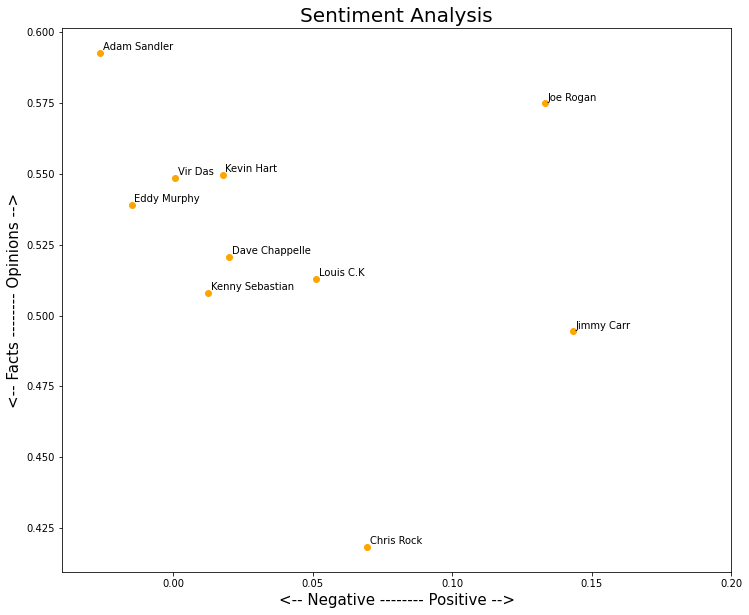

In [ ]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 10]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='orange')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.04, .20) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

In [ ]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
data

,transcript,full_name,polarity,subjectivity
adam,"[man] Okay, ready, and… Take your own cue, Adam. And action, Dan! [piano plays] ♪ It was the perfect day ♪\n♪ You had the sweetest smile ♪\n♪ You ...",Vir Das,0.000659,0.548614
chris,"[indistinct overlapping chatter] [woman] Ladies and gentlemen, Chris Rock. [audience cheers and applauds] Yeah. Please. Oh, sit down. Sit yo asses...",Kevin Hart,0.017613,0.549621
dave,Tacked onto the end of the Dave Chappelle’s Sticks and Stones is a secret 23-minute special called Epilogue: The Punchline. The hidden special con...,Kenny Sebastian,0.012565,0.508051
eddy,"After achieving fame with Saturday Night Live and Beverly Hills Cop, Eddie Murphy released a film version of one of his live stand-up performances...",Eddy Murphy,-0.015016,0.538857
jimmy,"[classical music playing] [applauding and cheering] Wow! Good evening, London. You well? -[audience] Yes! -Fabulous. You are in very safe hands th...",Dave Chappelle,0.019854,0.520745
joe,"[indistinct chattering] [faint laughter] [audience cheering and applauding] Oh! What the fuck, Boston? Goddamn! Thank you. It’s good to be here. G...",Adam Sandler,-0.026283,0.592575
kenny,Make some noise for Kenny Sebastian. Oh my God. Thank you so much Mumbai. Thank you. Thank you. Really. How are you guys doing? Oh shit. Let’s do ...,Joe Rogan,0.133179,0.574780
kevin,"Streaming on Netflix from November 17, 2020 [Kenzo babbling] [Kevin] Yo. What’s up? I was looking all over the house for y’all. [Eniko] We’re ju...",Louis C.K,0.051130,0.512896
louis,Announcer: Ladies and gentlemen — Louis C.K.! Louis C.K.: Thank you! [he grabs a microphone handed to him] Thank you. Thank you very much. [into t...,Chris Rock,0.069367,0.418358
vir,[soft piano music playing] [Vir Das] What you’re about to watch wasn’t supposed to happen. It’s completely unscripted. It was totally unplanned. I...,Jimmy Carr,0.143202,0.494408


In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['[man] Okay, ready, and… Take your own cue, Adam. And action, Dan! [piano plays] ♪ It was the perfect day ♪\n♪ You had the sweetest smile ♪\n♪ You were my only way ♪\n♪ Yeah, we were doing it in style ♪\n♪ We were walkin’ and talkin’ And jammin’ and jawin’ ♪\n♪ It was you and me against the world ♪\n♪ Then you got hit by an electric car ♪\n♪ ‘Cause you didn’t hear it comin’ ♪ [laughter] [cheering] Fuck those cars. You should… [cheers and applause] I have one. I have an electric car. But at least I have the decency when I’m driving, to put my head out the window and go, “Here comes the Sandman.” [laughter] “Sandman coming. Watch out.” How about those Tesla’s now driving themselves? Those Teslas, that’s pretty cool. They can drive themselves. Holy shit, man. I got in an accident with a Tesla and nobody was in there, and I didn’t know who to exchange the information with… and I started screaming, “Hey, you fucker. What the fuck?” And the Tesla’s, you know, fucking windshield wipers are 

In [ ]:
# The list has 10 elements, one for each transcript
len(list_pieces)

10

In [ ]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [ ]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.009687118437118444,
  -0.07175377155172412,
  0.027373417721518984,
  0.0372595882378491,
  0.07456670313813171,
  -0.09426850258175559,
  -0.03860950235950236,
  -0.03853103940732809,
  0.02689243626743627,
  0.10524023301801075],
 [-0.018213146502620167,
  0.021846726190476194,
  -0.014954281142399946,
  -0.13543790030632138,
  -0.023849206349206342,
  0.09658639971139965,
  0.040437742082478925,
  -0.0060840765660042885,
  0.10619408369408367,
  0.08806322785196022],
 [0.03152680652680653,
  -0.03594179258241758,
  0.03372448979591837,
  -0.08804945054945054,
  0.032870370370370376,
  0.04928229665071771,
  -0.004255952380952383,
  -0.06785714285714285,
  0.10679563492063492,
  0.08374344953292322],
 [0.004396487435801936,
  -0.05919179669179673,
  0.07922390109890107,
  -0.0063647959183673565,
  0.07521577380952381,
  -0.07157812460444034,
  -0.04640001202501205,
  -0.10440692049298608,
  -0.05502442238947924,
  0.043510074484339176],
 [0.010325730711368997,
  0.052347046413502

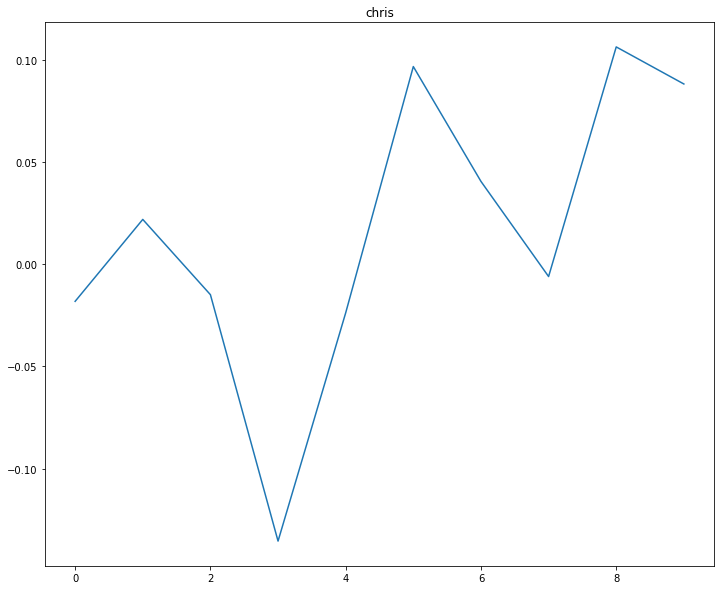

In [ ]:
plt.plot(polarity_transcript[1])
plt.title(data['full_name'].index[1])

plt.show()


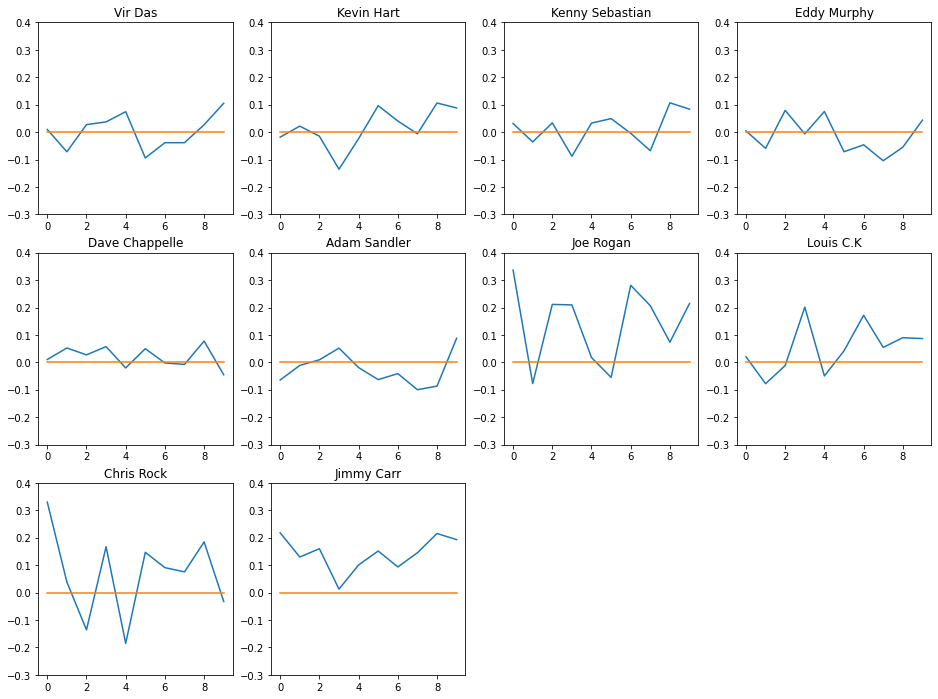

In [ ]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(-0.3,0.4)
    
plt.show()

## Additional Assignments:
1. Classify all comedian according to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


In [ ]:
# Calculate the subjectivity for each piece of text

subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for s in lp:
        subjectivity_piece.append(TextBlob(s).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)

subjectivity_transcript

[[0.47441086691086704,
  0.5272988505747119,
  0.5221167369901547,
  0.5390938409416671,
  0.5826225361939646,
  0.5879130808950083,
  0.60722543972544,
  0.6061182889275671,
  0.5287338050241277,
  0.49347175458286574],
 [0.5566060985797826,
  0.46725297619047607,
  0.49897768348263394,
  0.5674032302979675,
  0.6096825396825397,
  0.5228445165945166,
  0.5204887218045112,
  0.5798705645091183,
  0.6199482924482924,
  0.6037246204499725],
 [0.4840301365301365,
  0.5833791208791209,
  0.5127721088435375,
  0.5782326007326007,
  0.4696502057613169,
  0.542636895268474,
  0.4313690476190475,
  0.4571428571428572,
  0.518874007936508,
  0.4622066529961266],
 [0.538971706310416,
  0.49300366800366774,
  0.519778223912839,
  0.48806335034013637,
  0.5755016280016282,
  0.6486370598212702,
  0.5279205747955744,
  0.5248290871241689,
  0.5256757920110193,
  0.5484331232492997],
 [0.5580211691381903,
  0.4947694394213381,
  0.5593640730453916,
  0.491355960824046,
  0.5120488918837975,
  0.456

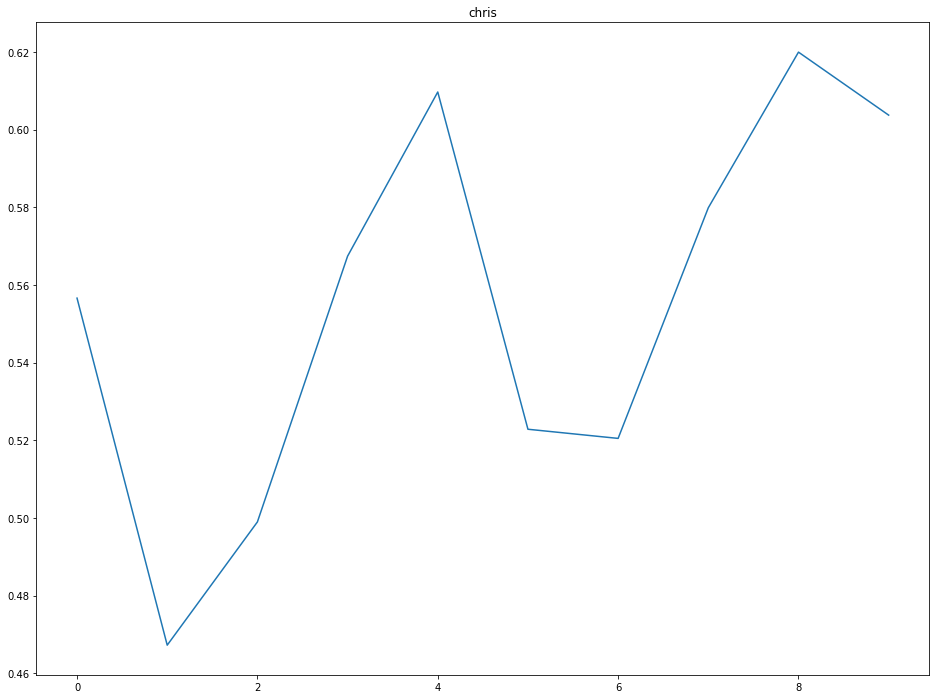

In [ ]:
plt.plot(subjectivity_transcript[1])
plt.title(data['full_name'].index[1])

plt.show()


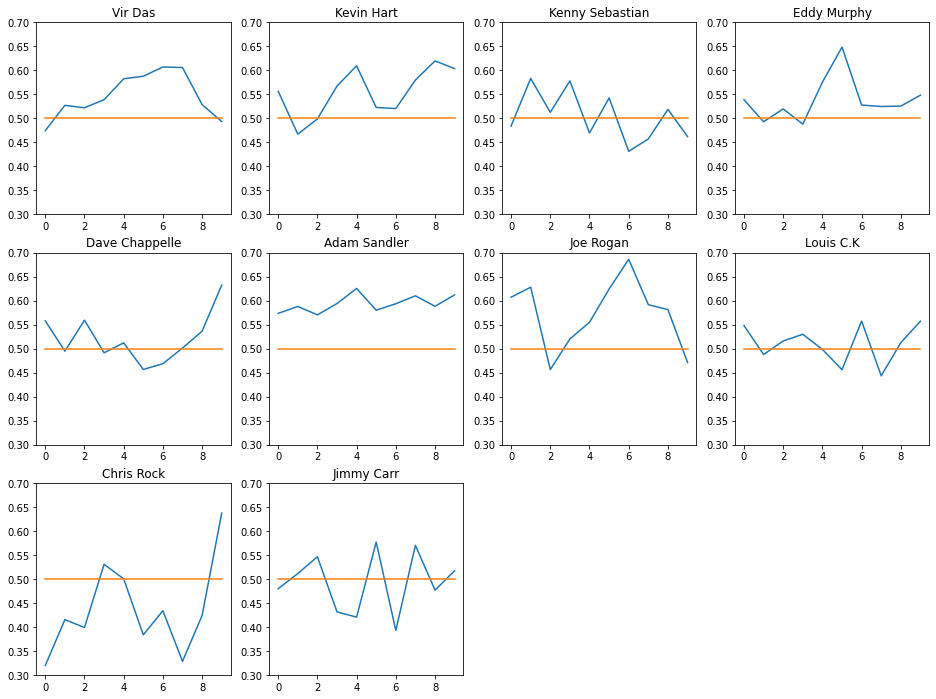

In [ ]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.plot(np.arange(0,10), [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5])
    plt.title(data['full_name'][index])
    plt.ylim(0.3,0.7)
    
plt.show()

## Additional Assignment-1
### POLARITY
* **Positive Polarity :-** Jimmy Carr and Joe Rogan have mostly positive polarity in their comedy transcripts which suggests that they rarely use negative words in their comedy.
* **Negative Polarity :-** Adam Sandler and Eddy Murphy are the notorious comedians from this data as they are the only comedians which have consistent negative polarity.
* **Neutral Polarity :-** Dave Chappelle and Kenny Sebastian are the comedians that have neutral words in their transcripts.

**Exceptional Case :-** Chris Rock has the most interesting and polarizing graph out of all the comedians in the list. His comedy changes its polarity a lot over time. 
### SUBJECTIVITY
* **Factual :-** Chris Rock is the only comedian in this list that has majority of his comedy based more on the facts therefore relying on more objective style comedy.
* **Opinionated :-** Adam Sandler, Joe Rogan, Eddy Murphy and Kevin Hart have their comedy based more on the opinions and intrepretations and can be classified as subjective/Opinionated Comedians.
* **Neutral :-** Jimmy Carr, Dave Chappelle and Louis CK have varied subjectivity over time in their comedy. They use both facts and opinions to convey their comedy.

## Additional Assignment-2

In [ ]:
# Split each routine into 20 parts
import numpy as np
import math

def split_text(text, n=20):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list



In [ ]:
# Let's create a list to hold all of the pieces of text
list_pieces2 = []
for t in data.transcript:
    split = split_text(t)
    list_pieces2.append(split)
    
list_pieces2

[['[man] Okay, ready, and… Take your own cue, Adam. And action, Dan! [piano plays] ♪ It was the perfect day ♪\n♪ You had the sweetest smile ♪\n♪ You were my only way ♪\n♪ Yeah, we were doing it in style ♪\n♪ We were walkin’ and talkin’ And jammin’ and jawin’ ♪\n♪ It was you and me against the world ♪\n♪ Then you got hit by an electric car ♪\n♪ ‘Cause you didn’t hear it comin’ ♪ [laughter] [cheering] Fuck those cars. You should… [cheers and applause] I have one. I have an electric car. But at least I have the decency when I’m driving, to put my head out the window and go, “Here comes the Sandman.” [laughter] “Sandman coming. Watch out.” How about those Tesla’s now driving themselves? Those Teslas, that’s pretty cool. They can drive themselves. Holy shit, man. I got in an accident with a Tesla and nobody was in there, and I didn’t know who to exchange the information with… and I started screaming, “Hey, you fucker. What the fuck?” And the Tesla’s, you know, fucking windshield wipers are 

In [ ]:
len(list_pieces2)

10

In [ ]:
len(list_pieces2[0])

20

In [ ]:
# Calculate the subjectivity for each piece of text

polarity_transcript2 = []
for lp in list_pieces2:
    polarity_piece = []
    for s in lp:
        polarity_piece.append(TextBlob(s).sentiment.polarity)
    polarity_transcript2.append(polarity_piece)

polarity_transcript2

[[-0.012322112753147237,
  0.027416776895943552,
  0.12694991789819376,
  -0.27045746100164186,
  -0.022779922779922784,
  0.0715561224489796,
  0.09433261183261184,
  -0.025001892047346593,
  0.01758658008658008,
  0.17009220354808588,
  0.02966269841269842,
  -0.1891945288753799,
  -0.028844246031746023,
  -0.050098039215686264,
  -0.046570961718020575,
  -0.029617212497647274,
  -0.010735080891330902,
  0.07461514095660436,
  0.18167293233082704,
  0.0376950568811034],
 [0.024739008157375498,
  -0.0639665286404417,
  -0.006219336219336216,
  0.041552684903748735,
  -0.04638347763347762,
  0.021155859506923363,
  -0.23025488400488403,
  -0.05591397849462368,
  0.10202020202020202,
  -0.17768959435626103,
  0.135091680350301,
  0.022142857142857127,
  -0.08637955182072828,
  0.14309936095650383,
  0.06992544492544493,
  -0.06570205157161678,
  0.11682027649769584,
  0.10551120448179273,
  0.015825667388167364,
  0.21200828157349894],
 [0.01572222222222223,
  0.053078512396694234,
  0.

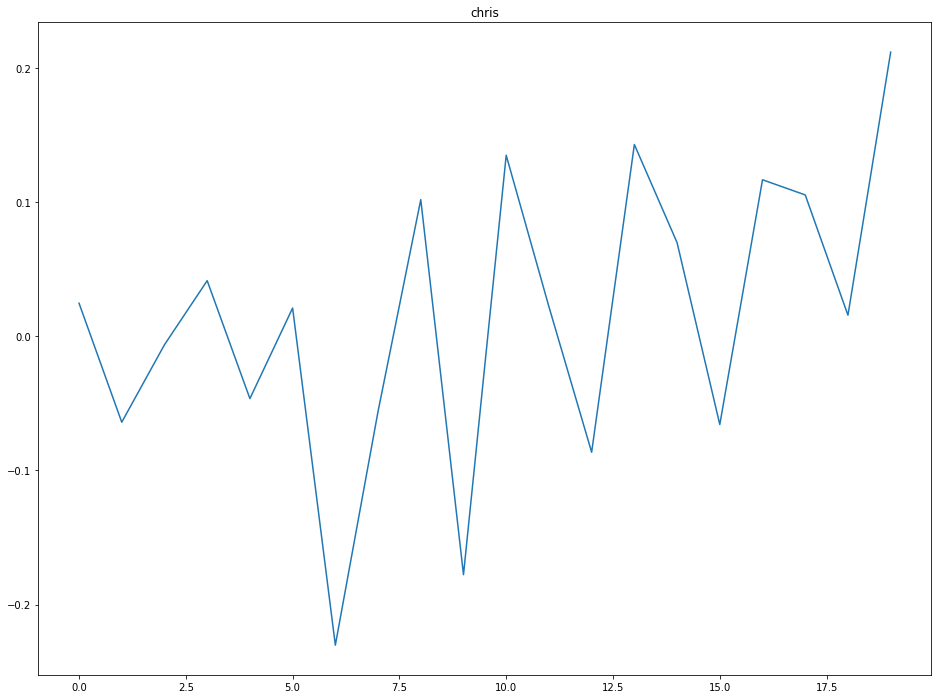

In [ ]:
plt.plot(polarity_transcript2[1])
plt.title(data['full_name'].index[1])

plt.show()


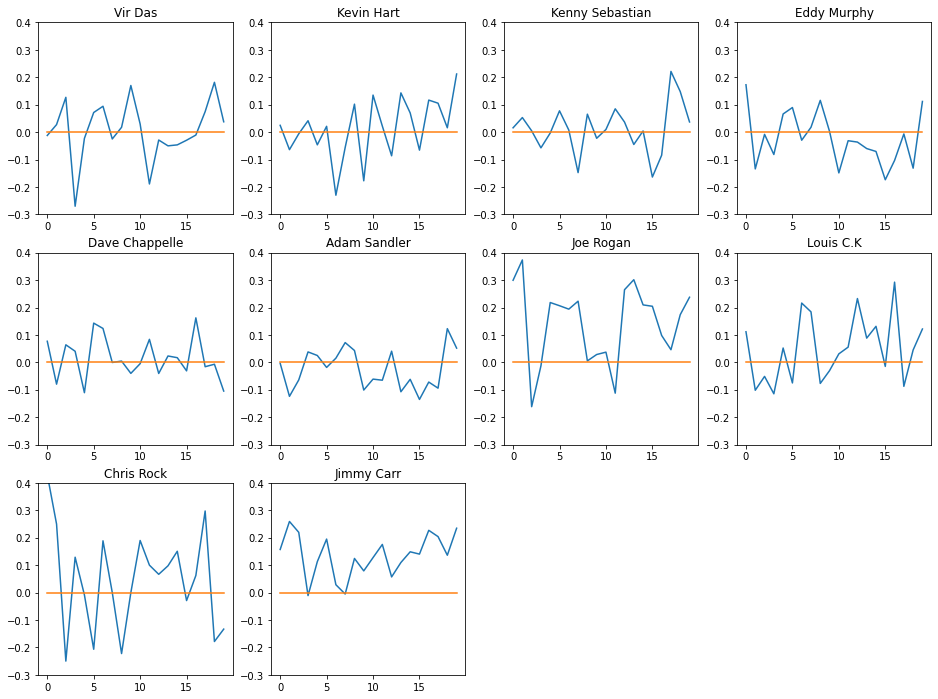

In [ ]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript2[index])
    plt.plot(np.arange(0,20), np.zeros(20))
    plt.title(data['full_name'][index])
    plt.ylim(-0.3,0.4)
    
plt.show()

In [ ]:
# Calculate the subjectivity for each piece of text

subjectivity_transcript2 = []
for lp in list_pieces2:
    subjectivity_piece = []
    for s in lp:
        subjectivity_piece.append(TextBlob(s).sentiment.subjectivity)
    subjectivity_transcript2.append(subjectivity_piece)

subjectivity_transcript2

[[0.5642104542966613,
  0.40207231040564373,
  0.5427545155993431,
  0.5118431855500825,
  0.5186615186615189,
  0.525160619803477,
  0.5848962842712845,
  0.489127539127539,
  0.6236424394319129,
  0.5138538748832867,
  0.5093915343915344,
  0.6480572441742657,
  0.5832837301587304,
  0.6353921568627452,
  0.615340802987862,
  0.595893327686806,
  0.560016788766789,
  0.4890578256431914,
  0.4473997493734336,
  0.5341865498842242],
 [0.5607264334305152,
  0.5522170462387853,
  0.5253210678210677,
  0.42648176291793327,
  0.4426807760141095,
  0.5636592367443433,
  0.665557081807082,
  0.4850806451612903,
  0.5538961038961038,
  0.6778659611992945,
  0.5365900383141762,
  0.49626984126984125,
  0.4891106442577029,
  0.545890022675737,
  0.5822751322751322,
  0.5775511324424368,
  0.5983614951356886,
  0.6343347338935574,
  0.6057077471139973,
  0.6126293995859214],
 [0.44023809523809526,
  0.5437465564738292,
  0.5031084656084656,
  0.625875350140056,
  0.5151315789473684,
  0.50997023

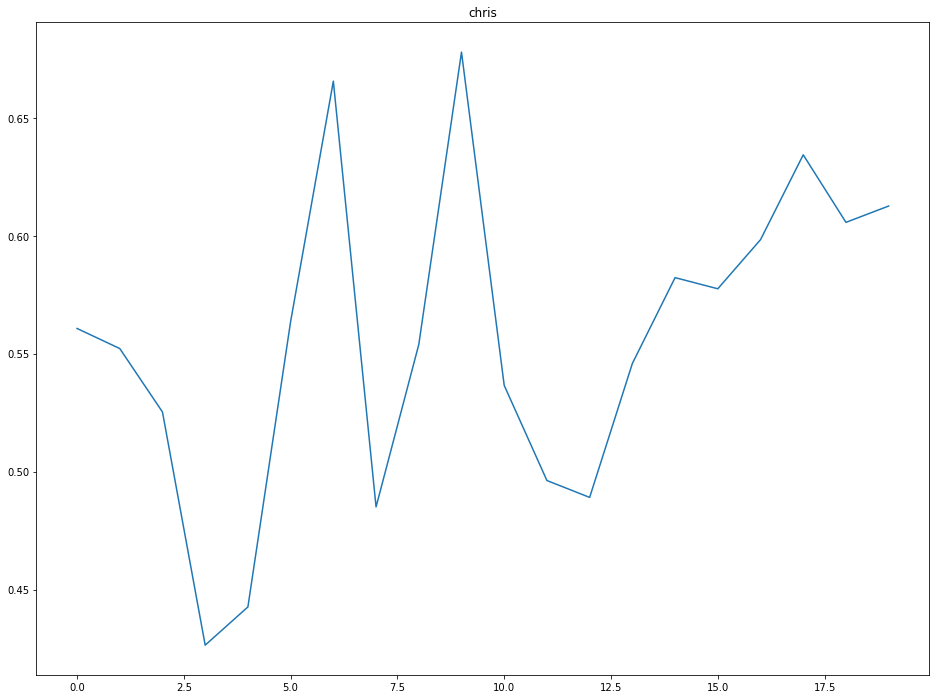

In [ ]:
plt.plot(subjectivity_transcript2[1])
plt.title(data['full_name'].index[1])

plt.show()


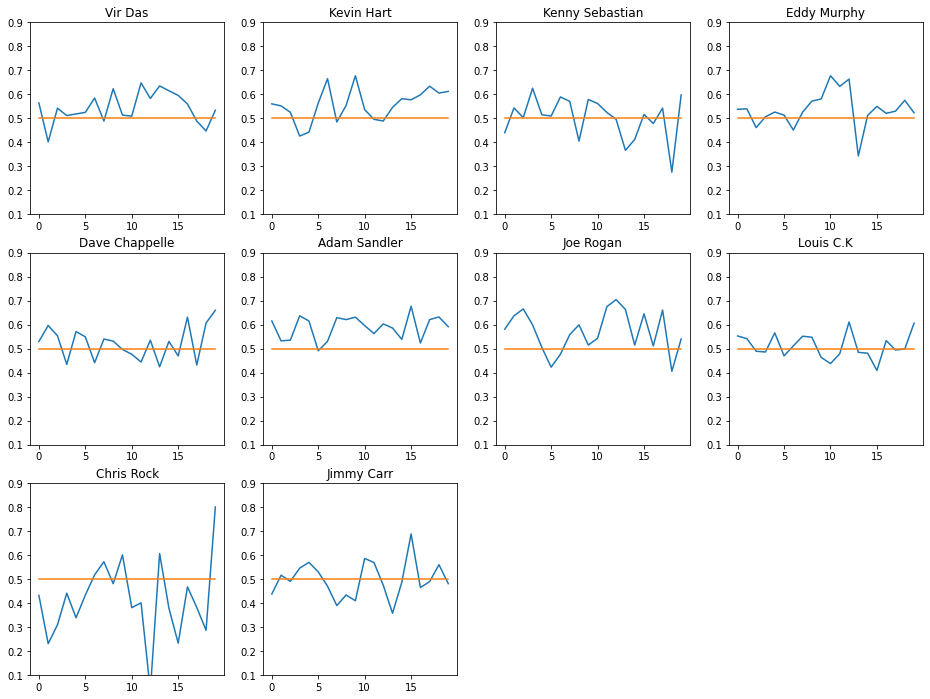

In [ ]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(subjectivity_transcript2[index])
    plt.plot(np.arange(0,20), [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5])
    plt.title(data['full_name'][index])
    plt.ylim(0.1,0.9)
    
plt.show()

## POLARITY
* **Positive Polarity :-** Only Jimmy Carr have mostly positive polarity in their comedy transcripts which suggests that they rarely use negative words in their comedy.
* **Negative Polarity :-** Adam Sandler, Eddy Murphy and Vir das are the notorious comedians from this data as they are the only comedians which have consistent negative polarity.
* **Neutral Polarity :-** Rest of the comedians(except Chris Rock) do not vary too much between positive and negative words and use neutral words in their transcripts.

**Exceptional Case :-** Chris Rock has the most interesting and polarizing graph out of all the comedians in the list. His comedy changes its polarity a lot over time. 

**Conclusion :-** After splitting the comedy routine into 20 parts, there have been a little change in the graphs and thus the classification. In this iteration, we observe that most of the comedians have their polarity closer to 0 i.e Neutral Polarity. 

## SUBJECTIVITY
* **Factual :-** Chris Rock is the only comedian in this list that has majority of his comedy based more on the facts therefore relying on more objective style comedy.
* **Opinionated :-** Adam Sandler, Joe Rogan, Eddy Murphy and Kevin Hart have their comedy based more on the opinions and intrepretations and can be classified as subjective/Opinionated Comedians.
* **Neutral :-** Jimmy Carr, Dave Chappelle, Vir Das and Louis CK have varied subjectivity over time in their comedy. They use both facts and opinions to convey their comedy.

**Conclusion :-** So Basically, Subjectivity graph is bit different after splitting the comedy routine into 20 parts, but the conclusion and classification is same as the pattern is pretty much similar to that of 10-part split comedy routine.

#Assignment-5

# Topic Modeling

## Introduction

Another popular text analysis technique is called topic modeling. The ultimate goal of topic modeling is to find various topics that are present in your corpus. Each document in the corpus will be made up of at least one topic, if not multiple topics.

In this notebook, we will be covering the steps on how to do **Latent Dirichlet Allocation (LDA)**, which is one of many topic modeling techniques. It was specifically designed for text data.

To use a topic modeling technique, you need to provide (1) a document-term matrix and (2) the number of topics you would like the algorithm to pick up.

Once the topic modeling technique is applied, your job as a human is to interpret the results and see if the mix of words in each topic make sense. If they don't make sense, you can try changing up the number of topics, the terms in the document-term matrix, model parameters, or even try a different model.

## Topic Modeling - Attempt #1 (All Text)

In [ ]:
data = pd.read_pickle('dtm_stop.pkl')
data

,aaaaaa,aah,abdomen,abdullahs,abide,abilities,ability,able,abortion,absolutely,...,zombies,zone,zoo,zoom,zucker,zuckerberg,zuckerfuck,zuckerfucker,zuckermother,zuckzucker
adam,0,0,0,0,0,0,0,1,0,3,...,0,0,2,0,0,0,0,0,0,0
chris,0,0,0,0,0,0,0,1,0,3,...,0,0,0,0,1,1,1,1,2,1
dave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
eddy,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jimmy,0,0,0,0,0,0,3,2,1,0,...,0,1,0,0,0,0,0,0,0,0
joe,0,6,1,0,0,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
kenny,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kevin,0,3,0,0,0,0,0,2,0,2,...,1,1,0,0,0,0,0,0,0,0
louis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vir,0,0,0,0,0,1,0,2,0,4,...,0,0,0,6,0,0,0,0,0,0


In [ ]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()

,adam,chris,dave,eddy,jimmy,joe,kenny,kevin,louis,vir
aaaaaa,0,0,0,0,0,0,2,0,0,0
aah,0,0,0,1,0,6,0,3,0,0
abdomen,0,0,0,0,0,1,0,0,0,0
abdullahs,0,0,0,1,0,0,0,0,0,0
abide,0,0,0,1,0,0,0,0,0,0


In [ ]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [ ]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), we need to specify two other parameters - the number of topics and the number of passes. Let's start the number of topics at 2, see if the results make sense, and increase the number from there.

In [ ]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.013*"fucking" + 0.009*"fuck" + 0.008*"man" + 0.007*"yeah" + 0.007*"people" + 0.006*"say" + 0.005*"going" + 0.005*"okay" + 0.005*"guys" + 0.005*"good"'),
 (1,
  '0.010*"said" + 0.009*"gonna" + 0.008*"man" + 0.007*"say" + 0.005*"people" + 0.005*"fuck" + 0.005*"good" + 0.005*"fcking" + 0.005*"going" + 0.005*"yeah"')]

In [ ]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.014*"fucking" + 0.010*"man" + 0.008*"fuck" + 0.008*"yeah" + 0.006*"say" + 0.006*"think" + 0.006*"good" + 0.006*"people" + 0.006*"said" + 0.006*"kids"'),
 (1,
  '0.008*"fuck" + 0.008*"say" + 0.007*"gonna" + 0.007*"people" + 0.006*"fucking" + 0.006*"going" + 0.006*"yeah" + 0.006*"man" + 0.006*"guys" + 0.006*"want"'),
 (2,
  '0.014*"fcking" + 0.013*"said" + 0.010*"man" + 0.010*"fck" + 0.007*"gonna" + 0.007*"gotta" + 0.007*"good" + 0.006*"time" + 0.005*"kids" + 0.005*"aint"')]

In [ ]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.014*"fucking" + 0.011*"fuck" + 0.009*"people" + 0.007*"want" + 0.006*"cat" + 0.006*"going" + 0.006*"cause" + 0.005*"woman" + 0.005*"good" + 0.005*"okay"'),
 (1,
  '0.010*"said" + 0.009*"man" + 0.009*"gonna" + 0.008*"say" + 0.007*"fcking" + 0.007*"come" + 0.006*"guys" + 0.006*"house" + 0.006*"going" + 0.006*"hey"'),
 (2,
  '0.017*"fucking" + 0.012*"man" + 0.011*"fuck" + 0.008*"yeah" + 0.008*"say" + 0.007*"kids" + 0.006*"good" + 0.006*"said" + 0.005*"people" + 0.005*"need"'),
 (3,
  '0.008*"er" + 0.007*"yeah" + 0.007*"think" + 0.007*"thing" + 0.006*"gonna" + 0.006*"really" + 0.005*"said" + 0.005*"people" + 0.005*"okay" + 0.005*"say"')]

These topics aren't looking too great. We've tried modifying our parameters. Let's try modifying our terms list as well.

## Topic Modeling - Attempt #2 (Nouns Only)

One popular trick is to look only at terms that are from one part of speech (only nouns, only adjectives, etc.). Check out the UPenn tag set: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [ ]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,transcript
adam,okay ready and take your own cue adam and action dan it was the perfect day you had the sweetest smile you were my only way yeah we were doi...
chris,ladies and gentlemen chris rock yeah please oh sit down sit yo asses down please let me get on with the show its nice to be here brooklyn heres...
dave,tacked onto the end of the dave chappelles sticks and stones is a secret special called epilogue the punchline the hidden special consists of cha...
eddy,after achieving fame with saturday night live and beverly hills cop eddie murphy released a film version of one of his live standup performances h...
jimmy,wow good evening london you well yes fabulous you are in very safe hands this evening ive been doing comedy now for uh money and sex its going ...
joe,oh what the fuck boston goddamn thank you its good to be here good to be back fuck i love it goddamn it good to see happy people having a good ...
kenny,make some noise for kenny sebastian oh my god thank you so much mumbai thank you thank you really how are you guys doing oh shit lets do this come...
kevin,streaming on netflix from november yo whats up i was looking all over the house for yall were just chilling about to go downstairs get some...
louis,announcer ladies and gentlemen louis ck louis ck thank you thank you thank you very much thank you very much you guys uh great to be here were...
vir,what youre about to watch wasnt supposed to happen its completely unscripted it was totally unplanned its just a moment in time when the world s...


In [ ]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

,transcript
adam,cue adam action dan day smile way style jammin jawin world car cause cars i car i decency im head window sandman teslas teslas man i accident tesl...
chris,ladies gentlemen rock yeah please sit yo show heres question cops kid couple months n i g calendar god shoot kid quick uh cardi b thats world equa...
dave,end dave chappelles sticks stones special punchline consists chappelle joking audience questions touching everything election comedians life metoo...
eddy,fame night live hills murphy film version standup performances topics divorce relations sexes problems hes fame listeners fans catch phrases dance...
jimmy,london hands evening comedy money sex london guy street didnt recognise i well dad mum speaking looks bbc news day liz hurley news news tv show th...
joe,boston goddamn thank i people time world today president exvice president attention couple weeks twitter donald trump joe biden joe biden i ear le...
kenny,noise oh god thank mumbai thank lets guys royal opera house royal opera house deal i none history deal i bath twice royal opera house deal occasio...
kevin,netflix yo i house yall work homework look eyes homework playing daddy ah ah boom boom headbutt whyre okay work part i bye bye bye dad pow ooh dad...
louis,announcer ladies gentlemen ck louis ck thank york uh hurricane citys city punch uh today power uh electricity insaaaaane amounts eletricity electr...
vir,youre wasnt moment time world shows charity money relief night id ask people question thing youre gon thing world day dont day thing world thing t...


In [ ]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaaaa,aah,abdomen,abilities,ability,abortion,ac,accent,accident,accountant,...,zippo,zombies,zone,zoo,zoom,zucker,zuckerberg,zuckerfucker,zuckermother,zuckzucker
adam,0,0,0,0,0,0,0,0,3,0,...,1,0,0,2,0,0,0,0,0,0
chris,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
dave,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
eddy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jimmy,0,0,0,0,3,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
joe,0,3,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kenny,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kevin,0,1,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,0,0,0
louis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vir,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,5,0,0,0,0,0


In [ ]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items  ())

In [ ]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.022*"man" + 0.012*"kids" + 0.011*"shit" + 0.009*"house" + 0.008*"fuck" + 0.008*"guy" + 0.008*"phone" + 0.007*"thing" + 0.007*"guys" + 0.006*"fck"'),
 (1,
  '0.011*"man" + 0.011*"shit" + 0.010*"fuck" + 0.010*"thing" + 0.009*"woman" + 0.007*"women" + 0.006*"gon" + 0.006*"men" + 0.006*"house" + 0.005*"ass"')]

In [ ]:
# Let's start with 3 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.010*"guy" + 0.009*"phone" + 0.008*"fuck" + 0.008*"man" + 0.008*"thing" + 0.007*"kids" + 0.006*"lady" + 0.006*"shes" + 0.006*"fucking" + 0.006*"hes"'),
 (1,
  '0.017*"man" + 0.013*"shit" + 0.010*"house" + 0.008*"gon" + 0.008*"thing" + 0.008*"ass" + 0.008*"fck" + 0.008*"guys" + 0.007*"women" + 0.006*"home"'),
 (2,
  '0.024*"man" + 0.016*"fuck" + 0.013*"shit" + 0.010*"kids" + 0.009*"thing" + 0.009*"woman" + 0.007*"god" + 0.006*"cause" + 0.006*"motherfucker" + 0.006*"house"')]

In [ ]:
# Let's start with 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.015*"man" + 0.014*"fuck" + 0.014*"shit" + 0.011*"phone" + 0.008*"woman" + 0.008*"gon" + 0.008*"motherfucker" + 0.007*"ass" + 0.007*"guy" + 0.007*"house"'),
 (1,
  '0.014*"man" + 0.011*"thing" + 0.011*"fck" + 0.006*"shit" + 0.006*"gon" + 0.006*"day" + 0.006*"house" + 0.006*"way" + 0.005*"cause" + 0.005*"joke"'),
 (2,
  '0.020*"man" + 0.012*"shit" + 0.012*"fuck" + 0.010*"thing" + 0.009*"house" + 0.008*"guys" + 0.008*"kids" + 0.007*"woman" + 0.006*"women" + 0.006*"god"')]

## Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [ ]:
# Let's create a function to pull out nouns and adjectives from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [ ]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
adam,okay ready own cue adam action dan perfect day sweetest smile only way style walkin talkin jammin jawin world electric car cause comin cars i elec...
chris,ladies gentlemen rock yeah please sit yo please show nice brooklyn heres question cops white kid good couple months theyd dead n i g calendar oh g...
dave,end dave chappelles sticks stones secret special punchline hidden special consists chappelle joking audience questions comedian touching everythin...
eddy,fame saturday night live hills eddie murphy film version live standup performances topics divorce relations sexes problems hes fame offended liste...
jimmy,good london fabulous safe hands evening ive comedy uh money sex i north london guy high street i i didnt recognise i well dad irish mum roger fede...
joe,fuck boston goddamn thank good good fuck i good happy people good time tense world today president exvice president attention couple weeks twitter...
kenny,noise kenny sebastian oh god thank much mumbai thank guys oh shit lets guys royal opera house royal opera house big deal i none history big deal i...
kevin,netflix november yo i house yall work champ homework look eyes homework playing give daddy ah ah boom boom headbutt kiss whyre kiss okay work most...
louis,announcer ladies gentlemen ck louis ck thank uh great new york uh hurricane citys city punch uh today power great uh much electricity insaaaaane a...
vir,youre wasnt unscripted unplanned moment time world shows charity money covid relief night id ask people same question first thing youre gon first ...


In [ ]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaaaa,aah,abdomen,abdullahs,abilities,ability,able,abortion,abstract,ac,...,zippo,zombies,zone,zoo,zoom,zucker,zuckerberg,zuckerfucker,zuckermother,zuckzucker
adam,0,0,0,0,0,0,1,0,0,0,...,1,0,0,2,0,0,0,0,0,0
chris,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,1,2,1
dave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
eddy,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jimmy,0,0,0,0,0,3,2,1,0,0,...,0,0,1,0,0,0,0,0,0,0
joe,0,4,1,0,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
kenny,2,0,0,0,0,0,0,0,3,1,...,0,0,0,0,0,0,0,0,0,0
kevin,0,2,0,0,0,0,2,0,0,0,...,0,1,1,0,0,0,0,0,0,0
louis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vir,0,0,0,0,1,0,2,0,0,0,...,0,0,0,0,5,0,0,0,0,0


In [ ]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [ ]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.009*"fuck" + 0.007*"kids" + 0.007*"gon" + 0.007*"house" + 0.007*"ass" + 0.007*"phone" + 0.007*"dick" + 0.006*"fck" + 0.005*"fucking" + 0.005*"day"'),
 (1,
  '0.010*"fuck" + 0.006*"house" + 0.006*"fucking" + 0.005*"bro" + 0.005*"kids" + 0.005*"women" + 0.005*"nice" + 0.004*"mom" + 0.004*"cause" + 0.004*"er"')]

In [ ]:
# Let's start with 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.011*"kids" + 0.011*"house" + 0.010*"fck" + 0.007*"fcking" + 0.007*"ta" + 0.006*"bro" + 0.006*"nice" + 0.006*"gon" + 0.006*"black" + 0.005*"school"'),
 (1,
  '0.008*"joke" + 0.005*"ladies" + 0.004*"cause" + 0.004*"women" + 0.004*"sex" + 0.004*"men" + 0.004*"mum" + 0.004*"funny" + 0.004*"jokes" + 0.003*"girlfriend"'),
 (2,
  '0.015*"fuck" + 0.009*"fucking" + 0.007*"phone" + 0.007*"gon" + 0.006*"dick" + 0.006*"women" + 0.006*"day" + 0.006*"house" + 0.006*"motherfucker" + 0.005*"kids"')]

In [ ]:
# Let's start with 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.007*"ladies" + 0.004*"uh" + 0.003*"today" + 0.003*"electricity" + 0.002*"dead" + 0.002*"airport" + 0.002*"game" + 0.002*"sudden" + 0.002*"ck" + 0.001*"funny"'),
 (1,
  '0.009*"fuck" + 0.008*"fck" + 0.006*"cause" + 0.006*"fcking" + 0.006*"kids" + 0.006*"fucking" + 0.006*"house" + 0.006*"men" + 0.005*"gon" + 0.005*"joke"'),
 (2,
  '0.014*"er" + 0.008*"fckin" + 0.006*"somebody" + 0.006*"day" + 0.006*"fck" + 0.005*"world" + 0.005*"gon" + 0.005*"food" + 0.005*"lockdown" + 0.004*"girlfriend"'),
 (3,
  '0.014*"fuck" + 0.010*"house" + 0.010*"kids" + 0.009*"phone" + 0.007*"motherfucker" + 0.007*"fucking" + 0.007*"gon" + 0.007*"women" + 0.007*"dick" + 0.007*"ass"')]

## Identify Topics in Each Document

Out of the 9 topic models we looked at, the nouns and adjectives, 4 topic one made the most sense. So let's pull that down here and run it through some more iterations to get more fine-tuned topics.

In [ ]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=50)
ldana.print_topics()

[(0,
  '0.013*"fuck" + 0.012*"house" + 0.009*"women" + 0.009*"motherfucker" + 0.008*"ass" + 0.008*"gon" + 0.007*"kids" + 0.007*"white" + 0.006*"dick" + 0.006*"home"'),
 (1,
  '0.019*"fck" + 0.014*"fcking" + 0.011*"kids" + 0.009*"house" + 0.007*"ta" + 0.007*"gon" + 0.007*"ass" + 0.007*"fckin" + 0.007*"dick" + 0.007*"vid"'),
 (2,
  '0.016*"fuck" + 0.011*"fucking" + 0.010*"cat" + 0.008*"dog" + 0.008*"men" + 0.006*"cause" + 0.006*"real" + 0.006*"kid" + 0.005*"cats" + 0.005*"women"'),
 (3,
  '0.008*"fuck" + 0.007*"phone" + 0.007*"fucking" + 0.006*"day" + 0.005*"er" + 0.005*"kids" + 0.005*"boy" + 0.005*"gon" + 0.004*"joke" + 0.004*"cause"')]

These four topics look pretty decent. Let's settle on these for now.
* Topic 0: kids, profanity
* Topic 1: house/home, world, mom, bro
* Topic 2: cat, dog, women
* Topic 3: profanity

In [ ]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(1, 'adam'),
 (1, 'chris'),
 (1, 'dave'),
 (1, 'eddy'),
 (2, 'jimmy'),
 (1, 'joe'),
 (0, 'kenny'),
 (3, 'kevin'),
 (3, 'louis'),
 (2, 'vir')]

For a first pass of LDA, these kind of make sense to me, so we'll call it a day for now.

* Topic 0: kids, profanity [Adam, Chris, Dave, Eddy]
* Topic 1: house/home, world, mom, bro [Kenny, Vir]
* Topic 2: cat, dog, women [Jimmy, Joe, Louis]
* Topic 3: profanity [Kevin]

### Assignment:
1. Try further modifying the parameters of the topic models above and see if you can get better topics.
2. Create a new topic model that includes terms from a different [part of speech](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) and see if you can get better topics.

### Modifying topic modelling parameters 


#### Changing number of topics 

In [ ]:
ldana = models.LdaModel(corpus=corpusna, num_topics=8, id2word=id2wordna, passes=50)
ldana.print_topics()

[(0,
  '0.018*"fck" + 0.011*"fcking" + 0.010*"fckin" + 0.009*"er" + 0.008*"gon" + 0.008*"kids" + 0.008*"house" + 0.007*"day" + 0.007*"somebody" + 0.006*"ass"'),
 (1,
  '0.000*"gon" + 0.000*"women" + 0.000*"house" + 0.000*"fuck" + 0.000*"fucking" + 0.000*"men" + 0.000*"day" + 0.000*"fck" + 0.000*"cause" + 0.000*"phone"'),
 (2,
  '0.020*"fuck" + 0.010*"women" + 0.009*"motherfucker" + 0.008*"gon" + 0.008*"fucking" + 0.008*"ass" + 0.008*"house" + 0.008*"men" + 0.007*"dick" + 0.007*"real"'),
 (3,
  '0.019*"bro" + 0.015*"nice" + 0.013*"mom" + 0.011*"house" + 0.009*"women" + 0.008*"home" + 0.008*"phone" + 0.008*"maid" + 0.008*"sir" + 0.006*"guitar"'),
 (4,
  '0.012*"ladies" + 0.006*"uh" + 0.005*"today" + 0.005*"electricity" + 0.003*"dead" + 0.003*"game" + 0.003*"airport" + 0.003*"sudden" + 0.003*"ck" + 0.002*"fault"'),
 (5,
  '0.000*"kids" + 0.000*"gon" + 0.000*"fuck" + 0.000*"house" + 0.000*"day" + 0.000*"dick" + 0.000*"somebody" + 0.000*"fck" + 0.000*"phone" + 0.000*"fucking"'),
 (6,
  '0.0

#### Changing Number of Passes

In [ ]:
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=200)
ldana.print_topics()

[(0,
  '0.012*"bro" + 0.009*"nice" + 0.009*"mom" + 0.007*"house" + 0.007*"women" + 0.006*"phone" + 0.006*"sir" + 0.005*"home" + 0.005*"maid" + 0.005*"club"'),
 (1,
  '0.000*"mess" + 0.000*"heat" + 0.000*"refugee" + 0.000*"therapist" + 0.000*"village" + 0.000*"candle" + 0.000*"useful" + 0.000*"gate" + 0.000*"weve" + 0.000*"alive"'),
 (2,
  '0.014*"fuck" + 0.009*"women" + 0.008*"men" + 0.006*"gon" + 0.006*"fucking" + 0.006*"ass" + 0.006*"house" + 0.006*"motherfucker" + 0.005*"dick" + 0.005*"real"'),
 (3,
  '0.013*"kids" + 0.009*"fck" + 0.008*"fuck" + 0.008*"house" + 0.007*"gon" + 0.007*"day" + 0.007*"fucking" + 0.006*"phone" + 0.006*"ta" + 0.006*"fcking"')]

#### Changing the Alpha parameter

In [ ]:
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=100, alpha = 'auto')
ldana.print_topics()

[(0,
  '0.008*"joke" + 0.005*"ladies" + 0.005*"women" + 0.005*"cause" + 0.005*"sex" + 0.005*"men" + 0.004*"funny" + 0.004*"mum" + 0.004*"jokes" + 0.004*"fuck"'),
 (1,
  '0.013*"phone" + 0.009*"fuck" + 0.009*"fucking" + 0.007*"kids" + 0.007*"nice" + 0.007*"bro" + 0.007*"boy" + 0.006*"house" + 0.006*"mom" + 0.005*"bar"'),
 (2,
  '0.019*"fuck" + 0.010*"house" + 0.009*"motherfucker" + 0.008*"women" + 0.008*"gon" + 0.008*"fucking" + 0.008*"kids" + 0.008*"ass" + 0.007*"dick" + 0.007*"men"'),
 (3,
  '0.016*"fck" + 0.010*"fcking" + 0.009*"fckin" + 0.008*"er" + 0.008*"gon" + 0.007*"kids" + 0.007*"house" + 0.007*"day" + 0.006*"somebody" + 0.005*"ta"')]

### Topic Modelling Attempt- (Nouns and Adverbs)

In [ ]:
# Let's create a function to pull out nouns and adverbs from a string of text
def nouns_adv(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adverbs.'''
    is_noun_adv = lambda pos: pos[:2] == 'NN' or pos[:2] == 'RB'
    tokenized = word_tokenize(text)
    nouns_adv = [word for (word, pos) in pos_tag(tokenized) if is_noun_adv(pos)] 
    return ' '.join(nouns_adv)

In [ ]:
# Apply the nouns_adv function to the transcripts to filter on nouns and adverbs
data_nouns_adv = pd.DataFrame(data_clean.transcript.apply(nouns_adv))
data_nouns_adv

,transcript
adam,cue adam action dan day smile way style jammin jawin world then car cause cars i car i decency im head window here sandman teslas now teslas prett...
chris,ladies gentlemen rock yeah please sit yo down show here heres question cops occasionally kid just couple months n i g calendar god up shoot kid qu...
dave,end dave chappelles sticks stones special punchline consists chappelle joking audience questions touching everything election most comedians life ...
eddy,fame night live beverly hills murphy film version standup performances mainly topics divorce relations sexes also problems hes fame listeners fans...
jimmy,wow london yes very hands evening comedy now money sex very well london now guy up street all didnt recognise really i well dad mum speaking looks...
joe,boston goddamn thank here back i people time world today president exvice president attention couple weeks ago twitter donald trump joe biden joe ...
kenny,noise oh god thank so mumbai thank really lets guys royal opera house royal opera house deal i none history deal i bath twice even apparently yes ...
kevin,netflix yo i house yall just about work homework look eyes homework playing daddy ah ah boom boom headbutt whyre okay work oh yes part i back bye ...
louis,announcer ladies gentlemen ck louis ck thank very much very much here york uh hurricane still here citys city really punch uh today power back uh ...
vir,youre wasnt completely totally just moment time world shows charity just money relief night id ask people question thing youre gon thing world day...


In [ ]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvnav = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvnav = cvnav.fit_transform(data_nouns_adv.transcript)
data_dtmnav = pd.DataFrame(data_cvnav.toarray(), columns=cvnav.get_feature_names())
data_dtmnav.index = data_nouns_adv.index
data_dtmnav

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaaaa,aah,abdomen,abilities,ability,abortion,absolutely,ac,academically,accent,...,zippo,zombies,zone,zoo,zoom,zucker,zuckerberg,zuckerfucker,zuckermother,zuckzucker
adam,0,0,0,0,0,0,3,0,0,0,...,1,0,0,2,0,0,0,0,0,0
chris,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,1,1,1,1,1
dave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
eddy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jimmy,0,0,0,0,3,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
joe,0,3,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kenny,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
kevin,0,1,0,0,0,0,2,0,1,0,...,0,1,1,0,0,0,0,0,0,0
louis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vir,0,0,0,1,0,0,4,0,0,1,...,0,0,0,0,5,0,0,0,0,0


In [ ]:
# Create the gensim corpus
corpusnav = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmnav.transpose()))

# Create the vocabulary dictionary
id2wordnav = dict((v, k) for k, v in cvnav.vocabulary_.items())

In [ ]:
#Topics = 2
ldanav = models.LdaModel(corpus=corpusnav, num_topics=2, id2word=id2wordnav, passes=10)
ldanav.print_topics()

[(0,
  '0.008*"phone" + 0.007*"fuck" + 0.006*"day" + 0.006*"kids" + 0.005*"boy" + 0.005*"fucking" + 0.005*"joke" + 0.004*"bar" + 0.004*"gon" + 0.004*"ears"'),
 (1,
  '0.013*"fuck" + 0.011*"house" + 0.009*"kids" + 0.008*"gon" + 0.008*"women" + 0.008*"ass" + 0.007*"motherfucker" + 0.006*"dick" + 0.006*"fck" + 0.006*"home"')]

In [ ]:
#Topics = 3
ldanav = models.LdaModel(corpus=corpusnav, num_topics=3, id2word=id2wordnav, passes=10)
ldanav.print_topics()

[(0,
  '0.013*"fck" + 0.010*"kids" + 0.009*"house" + 0.008*"fuck" + 0.007*"cause" + 0.006*"men" + 0.006*"gon" + 0.006*"cat" + 0.006*"dick" + 0.006*"fcking"'),
 (1,
  '0.009*"fuck" + 0.008*"phone" + 0.007*"day" + 0.006*"kids" + 0.006*"boy" + 0.005*"fucking" + 0.005*"gon" + 0.005*"joke" + 0.005*"cause" + 0.005*"bar"'),
 (2,
  '0.014*"fuck" + 0.013*"house" + 0.010*"women" + 0.010*"motherfucker" + 0.009*"ass" + 0.009*"gon" + 0.008*"kids" + 0.008*"home" + 0.006*"phone" + 0.006*"god"')]

In [ ]:
#Topics = 4
ldanav = models.LdaModel(corpus=corpusnav, num_topics=4, id2word=id2wordnav, passes=10)
ldanav.print_topics()

[(0,
  '0.019*"fuck" + 0.011*"women" + 0.010*"ass" + 0.010*"house" + 0.010*"men" + 0.009*"gon" + 0.009*"motherfucker" + 0.007*"dick" + 0.006*"yall" + 0.006*"cat"'),
 (1,
  '0.013*"fck" + 0.012*"kids" + 0.009*"phone" + 0.009*"day" + 0.008*"gon" + 0.007*"house" + 0.007*"wife" + 0.006*"boy" + 0.006*"fuck" + 0.005*"somebody"'),
 (2,
  '0.009*"bro" + 0.009*"women" + 0.008*"joke" + 0.007*"house" + 0.006*"mom" + 0.005*"phone" + 0.005*"men" + 0.005*"home" + 0.005*"sir" + 0.004*"ladies"'),
 (3,
  '0.017*"fuck" + 0.015*"kids" + 0.012*"god" + 0.010*"motherfucker" + 0.008*"house" + 0.008*"school" + 0.008*"tambourine" + 0.006*"gon" + 0.006*"yo" + 0.005*"cause"')]

### Topic Modelling Attempt-(Adjectives Only)

In [ ]:
# Let's create a function to pull out nouns and adverbs from a string of text
def adjectives(text):
    '''Given a string of text, tokenize the text and pull out only the adjectives.'''
    is_adj = lambda pos: pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    adj = [word for (word, pos) in pos_tag(tokenized) if is_adj(pos)] 
    return ' '.join(adj)

In [ ]:
# Apply the adjectives function to the transcripts to filter on nouns and adverbs
data_adj = pd.DataFrame(data_clean.transcript.apply(adjectives))
data_adj

,transcript
adam,okay ready own perfect sweetest only walkin talkin electric comin electric least sandman cool holy shit uh liar much rude unsugared hey oh hey gra...
chris,please nice brooklyn white good theyd dead oh ta white first i real equal white shot equal white next racquetball im sure famous famous famous chr...
dave,secret hidden special comedian presidential influential bad i much same couple i little n much right pussy many pussy only much new good much n i ...
eddy,saturday eddie live offended unprintable little i hereyes sweet little little new lt old lester niece gay little eddie oh talent favorite best im ...
jimmy,good fabulous safe ive uh i north high i i irish roger federer proper other new liz good good best i i crude ill um further broken last clear clea...
joe,fuck good good fuck good happy good tense hard happen free like more more crazy fucking ridiculous first guys didnt new shit i only lazy long grea...
kenny,kenny sebastian much guys oh shit big big possible great big ive know yaay difficult i much best best great good enough painful great high great h...
kevin,november champ give kiss kiss most good big haya nice hi first ive i imma yall good good right ive different arenas own im comfortable comfortable...
louis,uh great new great much criminal last old thats funny fine dead dead old old sudden inappropriate sudden working whoaaa old little other sure your...
vir,unscripted unplanned covid same first first welcome lockdown entire same same i special good strangest standup worried indias official corona coro...


In [ ]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cva = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cva = cva.fit_transform(data_adj.transcript)
data_dtma = pd.DataFrame(data_cva.toarray(), columns=cva.get_feature_names())
data_dtma.index = data_adj.index
data_dtma

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaaaaa,aah,abdullahs,able,abstract,act,actual,admin,afford,africa,...,yo,youd,youll,young,younger,youngerthe,youngest,youve,yuck,zuckermother
adam,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
chris,0,0,0,1,0,0,0,0,0,0,...,3,0,0,2,1,0,0,0,0,1
dave,0,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
eddy,0,0,1,0,0,1,0,0,1,1,...,6,3,1,0,0,0,0,1,0,0
jimmy,0,0,0,2,0,0,0,0,0,0,...,0,1,0,2,0,1,0,0,0,0
joe,0,1,0,2,0,0,1,0,0,0,...,1,4,0,4,0,0,0,0,0,0
kenny,1,0,0,0,3,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
kevin,0,1,0,2,0,0,0,0,0,0,...,0,0,0,2,2,0,0,0,0,0
louis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vir,0,0,0,2,0,0,2,1,0,0,...,0,0,0,1,0,0,1,1,0,0


In [ ]:
# Create the gensim corpus
corpusa = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtma.transpose()))

# Create the vocabulary dictionary
id2worda = dict((v, k) for k, v in cva.vocabulary_.items())

In [ ]:
#Topics = 2
ldaa = models.LdaModel(corpus=corpusa, num_topics=2, id2word=id2worda, passes=10)
ldaa.print_topics()

[(0,
  '0.017*"white" + 0.016*"real" + 0.013*"black" + 0.013*"nice" + 0.012*"shit" + 0.012*"ta" + 0.011*"fucking" + 0.011*"hard" + 0.010*"ok" + 0.008*"better"'),
 (1,
  '0.012*"fckin" + 0.010*"ta" + 0.009*"slow" + 0.009*"best" + 0.009*"ufc" + 0.009*"fcking" + 0.007*"wrong" + 0.007*"okay" + 0.007*"fucking" + 0.006*"older"')]

In [ ]:
#Topics = 3
ldaa = models.LdaModel(corpus=corpusa, num_topics=3, id2word=id2worda, passes=10)
ldaa.print_topics()

[(0,
  '0.020*"nice" + 0.013*"slow" + 0.013*"ufc" + 0.011*"best" + 0.009*"fucking" + 0.009*"okay" + 0.009*"uber" + 0.007*"wrong" + 0.007*"uh" + 0.007*"sorry"'),
 (1,
  '0.014*"real" + 0.013*"fucking" + 0.012*"er" + 0.011*"fckin" + 0.009*"okay" + 0.008*"happy" + 0.007*"funny" + 0.007*"fuck" + 0.007*"hard" + 0.006*"hillary"'),
 (2,
  '0.026*"white" + 0.024*"ta" + 0.022*"black" + 0.015*"shit" + 0.013*"better" + 0.012*"ok" + 0.012*"real" + 0.010*"fcking" + 0.009*"hard" + 0.008*"different"')]

In [ ]:
#Topics = 4
ldaa = models.LdaModel(corpus=corpusa, num_topics=4, id2word=id2worda, passes=10)
ldaa.print_topics()

[(0,
  '0.015*"nice" + 0.012*"fucking" + 0.010*"okay" + 0.009*"funny" + 0.009*"real" + 0.008*"wrong" + 0.007*"best" + 0.007*"um" + 0.007*"happy" + 0.007*"super"'),
 (1,
  '0.002*"white" + 0.002*"real" + 0.001*"shit" + 0.001*"ok" + 0.001*"black" + 0.001*"hard" + 0.001*"eddie" + 0.001*"ta" + 0.001*"fucking" + 0.001*"wrong"'),
 (2,
  '0.021*"black" + 0.021*"slow" + 0.020*"ufc" + 0.019*"ta" + 0.018*"white" + 0.018*"ok" + 0.017*"fucking" + 0.014*"hard" + 0.012*"nice" + 0.012*"uber"'),
 (3,
  '0.018*"white" + 0.017*"ta" + 0.016*"fckin" + 0.014*"shit" + 0.013*"real" + 0.012*"fcking" + 0.011*"better" + 0.011*"black" + 0.009*"best" + 0.009*"different"')]

### Final Model 

In [ ]:
#Chosen Model- Adjectives only with No. of topics = 5, No. of Passes = 100, and Alpha parameter set to Auto
ldaa = models.LdaModel(corpus=corpusa, num_topics=5, id2word=id2worda, passes=100, alpha = 'auto')
ldaa.print_topics()

[(0,
  '0.024*"er" + 0.022*"fckin" + 0.013*"lockdown" + 0.013*"indian" + 0.008*"happy" + 0.008*"corona" + 0.008*"american" + 0.008*"hillary" + 0.007*"asian" + 0.007*"india"'),
 (1,
  '0.007*"dead" + 0.007*"sudden" + 0.004*"funny" + 0.004*"favorite" + 0.004*"physical" + 0.004*"negative" + 0.004*"useful" + 0.004*"different" + 0.004*"uh" + 0.004*"ridiculous"'),
 (2,
  '0.036*"black" + 0.032*"white" + 0.032*"ok" + 0.030*"ta" + 0.021*"hard" + 0.014*"god" + 0.011*"shit" + 0.011*"high" + 0.010*"na" + 0.008*"better"'),
 (3,
  '0.020*"nice" + 0.014*"slow" + 0.013*"ufc" + 0.011*"best" + 0.011*"fucking" + 0.011*"uh" + 0.010*"okay" + 0.009*"uber" + 0.007*"sorry" + 0.007*"wrong"'),
 (4,
  '0.020*"real" + 0.019*"ta" + 0.017*"white" + 0.016*"shit" + 0.012*"better" + 0.011*"black" + 0.011*"fucking" + 0.011*"fcking" + 0.010*"wrong" + 0.009*"honest"')]

#### Let's divide these five topics accordingly:

* **Topic 0:**  Lockdown,Corona,Indian
* **Topic 1:**  Dead, Physical, Ridiculous
* **Topic 2:**  Black, White, God
* **Topic 3:**  UFC, Uber
* **Topic 4:**  Reality, Honesty, Profanity

In [ ]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldaa[corpusa]
list(zip([a for [(a,b)] in corpus_transformed], data_dtma.index))

[(3, 'adam'),
 (2, 'chris'),
 (3, 'dave'),
 (4, 'eddy'),
 (3, 'jimmy'),
 (4, 'joe'),
 (3, 'kenny'),
 (4, 'kevin'),
 (1, 'louis'),
 (0, 'vir')]

#### Let's Assign these topics to the comedians accordingly:

* **Topic 0:** [Vir Das]
* **Topic 1:** [Louis CK]
* **Topic 2:** [Chris Rock]
* **Topic 3:** [Adam Sandler, Dave Chappelle, Jimmy Carr, Kenny Sebastian]
* **Topic 4:** [Eddy Murphy, Joe Rogan, Kevin Hart]

# Assignment-6

# Text Generation

## Introduction

Markov chains can be used for very basic text generation. Think about every word in a corpus as a state. We can make a simple assumption that the next word is only dependent on the previous word - which is the basic assumption of a Markov chain.

Markov chains don't generate text as well as deep learning, but it's a good (and fun!) start.

## Select Text to Imitate

In this notebook, we're specifically going to generate text in the style of Ali Wong, so as a first step, let's extract the text from her comedy routine.

In [ ]:
data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
adam,"[man] Okay, ready, and… Take your own cue, Adam. And action, Dan! [piano plays] ♪ It was the perfect day ♪\n♪ You had the sweetest smile ♪\n♪ You ...",Vir Das
chris,"[indistinct overlapping chatter] [woman] Ladies and gentlemen, Chris Rock. [audience cheers and applauds] Yeah. Please. Oh, sit down. Sit yo asses...",Kevin Hart
dave,Tacked onto the end of the Dave Chappelle’s Sticks and Stones is a secret 23-minute special called Epilogue: The Punchline. The hidden special con...,Kenny Sebastian
eddy,"After achieving fame with Saturday Night Live and Beverly Hills Cop, Eddie Murphy released a film version of one of his live stand-up performances...",Eddy Murphy
jimmy,"[classical music playing] [applauding and cheering] Wow! Good evening, London. You well? -[audience] Yes! -Fabulous. You are in very safe hands th...",Dave Chappelle
joe,"[indistinct chattering] [faint laughter] [audience cheering and applauding] Oh! What the fuck, Boston? Goddamn! Thank you. It’s good to be here. G...",Adam Sandler
kenny,Make some noise for Kenny Sebastian. Oh my God. Thank you so much Mumbai. Thank you. Thank you. Really. How are you guys doing? Oh shit. Let’s do ...,Joe Rogan
kevin,"Streaming on Netflix from November 17, 2020 [Kenzo babbling] [Kevin] Yo. What’s up? I was looking all over the house for y’all. [Eniko] We’re ju...",Louis C.K
louis,Announcer: Ladies and gentlemen — Louis C.K.! Louis C.K.: Thank you! [he grabs a microphone handed to him] Thank you. Thank you very much. [into t...,Chris Rock
vir,[soft piano music playing] [Vir Das] What you’re about to watch wasn’t supposed to happen. It’s completely unscripted. It was totally unplanned. I...,Jimmy Carr


In [ ]:
# Extract only Vir Das's text
vir_text = data.transcript.loc['vir']
vir_text[:200]

'[soft piano music playing] [Vir Das] What you’re about to watch wasn’t supposed to happen. It’s completely unscripted. It was totally unplanned. It’s just… a moment in time. When the world shut down, '

## Build a Markov Chain Function

We are going to build a simple Markov chain function that creates a dictionary:
* The keys should be all of the words in the corpus
* The values should be a list of the words that follow the keys

In [ ]:
from collections import defaultdict

def markov_chain(text):
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''
    
    # Tokenize the text by word, though including punctuation
    words = text.split(' ')
    
    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)
    
    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [ ]:
# Create the dictionary for Vir's routine, take a look at it
vir_dict = markov_chain(vir_text)
vir_dict

{'[soft': ['piano', 'guitar'],
 'piano': ['music'],
 'music': ['playing]', 'playing]', 'playing]'],
 'playing]': ['[Vir', 'Bye.', 'Your'],
 '[Vir': ['Das]',
  'Das]',
  'Das]',
  'Das]',
  'Das]',
  'Das',
  'Das]',
  'Das]',
  'Das]'],
 'Das]': ['What',
  'I',
  'You’re',
  'You’re',
  'Sheesha',
  'What',
  'Cole.',
  'Whatever'],
 'What': ['you’re',
  'time',
  'are',
  'do',
  'kind',
  'happens',
  'time',
  'a',
  'are',
  'is',
  'do',
  'the',
  'do',
  'do',
  'time',
  'do',
  'the…',
  'the',
  'did'],
 'you’re': ['about',
  'gonna',
  'not',
  'going',
  'meeting?',
  'like…',
  'going',
  'in',
  'gonna',
  'gonna',
  'going',
  'like,',
  'alone',
  'looking',
  'watching',
  'stuck',
  'having',
  'f*ckin’',
  'a',
  'gonna',
  'gonna',
  'a',
  'diabetic,',
  'like,',
  'like,',
  'watching',
  'isolated',
  'doing.',
  'safe.'],
 'about': ['to',
  'the',
  'this',
  'you.',
  'technology.',
  'that',
  'the',
  'their',
  'exactly?',
  'that',
  'my',
  'to',
  'this.'

## Create a Text Generator

We're going to create a function that generates sentences. It will take two things as inputs:
* The dictionary you just created
* The number of words you want generated

Here are some examples of generated sentences:

>'Shape right turn– I also takes so that she’s got women all know that snail-trail.'

>'Optimum level of early retirement, and be sure all the following Tuesday… because it’s too.'

In [ ]:
import random

def generate_sentence(chain, count=15):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [ ]:
generate_sentence(vir_dict)

'Free, so long. You know what that I actually turns, er, Spanish village, f*ckin’ separated….'

### Assignment:
1. Generate sentence for other comedians also.
2. Try making the generate_sentence function better. Maybe allow it to end with a random punctuation mark or end whenever it gets to a word that already ends with a punctuation mark.

### Additional Assignment-1 & 2

#### Sentence Generation Function(Better)

In [ ]:
import random

def generate_sentence(chain, count=15):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first  and starting it with -->
    word1 = random.choice(list(chain.keys()))
    sentence = ''
    sentence += '-->' + word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat. Also stop generating next words when period in the generated word
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2
        if "." in word2:
          break

    # End it with <--
    sentence += '<--'
    return(sentence)

#### Louis CK

In [ ]:
# Extract only Louis CK's text
louis_text = data.transcript.loc['louis']
louis_text[:200]

'Announcer: Ladies and gentlemen — Louis C.K.! Louis C.K.: Thank you! [he grabs a microphone handed to him] Thank you. Thank you very much. [into the microphone] Thank you very much, you guys! Uh — gre'

In [ ]:
# Create the dictionary for Louis's routine, take a look at it
louis_dict = markov_chain(louis_text)
louis_dict

{'Announcer:': ['Ladies'],
 'Ladies': ['and'],
 'and': ['gentlemen',
  'the',
  'this',
  'she’s',
  'she',
  'all',
  'me',
  'all',
  'she',
  'she',
  'she’s',
  'none',
  'she,',
  'I’ll',
  'all,',
  'ever',
  'she',
  'she',
  'old',
  'he’s',
  'there’s',
  'spend',
  'we',
  'Donald',
  'why',
  'where'],
 'gentlemen': ['—'],
 '—': ['Louis',
  'great',
  'WHOO-OO-OO!!',
  'I',
  'I',
  'this',
  'you',
  'and',
  'I’m'],
 'Louis': ['C.K.!', 'C.K.:'],
 'C.K.!': ['Louis'],
 'C.K.:': ['Thank'],
 'Thank': ['you!', 'you.', 'you', 'you'],
 'you!': ['[he', 'I'],
 '[he': ['grabs'],
 'grabs': ['a'],
 'a': ['microphone',
  'hurricane,',
  'punch,',
  'criminal',
  'candle,',
  'sudden,',
  'sudden,',
  'working',
  'little',
  'game',
  'baby',
  'physical',
  'stranger.',
  'passport',
  'black-and-white',
  'different',
  'village',
  'refugee,',
  'muddy',
  'cart,',
  'big,',
  'bunch',
  'guy',
  'supermarket,',
  'boner',
  'great',
  'speech',
  'box'],
 'microphone': ['handed'],


In [ ]:
generate_sentence(louis_dict)

'-->Remains the airport, and Donald Trump.<--'

#### Chris Rock

In [ ]:
# Extract only Chris Rock's text
chris_text = data.transcript.loc['chris']
chris_text[:200]

'[indistinct overlapping chatter] [woman] Ladies and gentlemen, Chris Rock. [audience cheers and applauds] Yeah. Please. Oh, sit down. Sit yo asses down. Please let me get on with the show. It’s nice t'

In [ ]:
# Create the dictionary for Chris's routine, take a look at it
chris_dict = markov_chain(chris_text)
generate_sentence(chris_dict)

'-->Equals.” No, man.<--'

#### Eddy Murphy

In [ ]:
# Extract only Eddy Murphy's text
eddy_text = data.transcript.loc['eddy']
eddy_text[:200]

'After achieving fame with Saturday Night Live and Beverly Hills Cop, Eddie Murphy released a film version of one of his live stand-up performances. He mainly focuses on the topics of divorce and relat'

In [ ]:
# Create the dictionary for Eddy's routine, take a look at it
eddy_dict = markov_chain(eddy_text)
generate_sentence(eddy_dict)

'-->You’ man.”<--'

#### Dave Chappelle 

In [ ]:
# Extract only Dave Chappelle's text
dave_text = data.transcript.loc['dave']
dave_text[:200]

'Tacked onto the end of the Dave Chappelle’s Sticks and Stones is a secret 23-minute special called Epilogue: The Punchline. The hidden special consists of Chappelle joking with the audience and inviti'

In [ ]:
# Create the dictionary for Dave's routine, take a look at it
dave_dict = markov_chain(dave_text)
generate_sentence(dave_dict)

'-->What’s your favorite.<--'

#### Joe Rogan

In [ ]:
# Extract only Joe Rogan's text
joe_text = data.transcript.loc['joe']
joe_text[:200]

'[indistinct chattering] [faint laughter] [audience cheering and applauding] Oh! What the fuck, Boston? Goddamn! Thank you. It’s good to be here. Good to be back. Fuck! I love it. Goddamn it! Good to s'

In [ ]:
# Create the dictionary for Joe's routine, take a look at it
joe_dict = markov_chain(joe_text)
generate_sentence(joe_dict)

'-->Talks about seven.<--'

# Final Summary About Each Comedian:

* **Adam Sandler:** Adam Sandler is Observational Comedian with great vocabulary. His comedy is not regarded as family-friendly as he uses lot of swears in his routine. He has a negative-polarity based  and opinionated comedy routine. Topics covered in his comedy mostly include UFC, Uber/Ubermensch,Kids and use of Profanity. 
* **Chris Rock:** Chris Rock is a black comedian and has comparitively slow paced comedy.
His comedy routine also is not regarded as very family friendly due to swearing. Chris Rock relies on facts in his comedy routine and his routine is very volatile regarding polarity. Topics covered in his comedy are Black and white and God related topics.
* **Dave Chappelle:** Dave Chappelle is a black satirical comedian and has very slow-paced comedy routine.His comedy routine compared to other comedians in the list is family-friendly as he uses meagre amount of swears.
Dave has more opinionated comedy and has neutral polarity in his routine. Topics covered in his comedy can be explained as more profanity based, Ubermensch and UFC.
* **Eddy Murphy:** Eddy Murphy is black comedian specializing in insult and satirical comedy with great vocabulary. His comedy routine is super hardcore and can't be regarded family-friendly due to huge amount of swearing. Eddy has mostly negative polarity in his comedy routine and uses opinions and subjectivity.Topics covered in his comedy are based on reality, honesty, and Profanity.
* **Jimmy Carr:** Jimmy Carr is a British Comedian has exquisite vocabulary and has fast-paced comedy. His comedy routine can be regarded as family friendly compared to other comedians. Jimmy Carr mostly uses Positive words adn is pretty neutral in its subjectivity as he relies on both opinions and facts in his routine. Topics covered in his comedy are based on Cats and Dogs, Women and Ubermensch.
* **Joe Rogan:** Joe Rogan is an Observational Comedian and has decent vocabulary. His comedy routine can not be regarded as family-friendly. Joe Rogan has more opinionated comedy routine and has mostly positive polarity in the words used by him. Topics covered in his comedy are based on Cats and Dogs , women, Reality and Honesty with a bit of Profanity.
* **Kenny Sebastien:**Kenny Sebastien is Clean Indian comedian and has decent vocab and talking speed. His comedy is pretty clean and can be regarded as Family-Friendly. Kenny has pretty neutral polarity and subjectivity in his comedy routine. Topics covered in his comedy are based on World, Family, Ubermensch and UFC.
* **Kevin Hart:** Kevin Hart is a Black Slap-stick Comedian with very fast-paced comedy routine. His comedy includes a good amount of swearing and therefore making it Non-Family-Friendly. Kevin has volatile polarity and opinionated comedy routine. Topics covered in his comedy are based on Reality, Honesty and Profanity
* **Louis CK:** Louis CK is self-deprecating comedian with decent talking speed. He has very family-friendly and clean comedy as he uses negligible amount of swearing in his comedy. Louis has positive polarity and neutral subjectivity in his comedy routine. Topics Covered in his comedy are based on Death, Physical and Ridiculous Comedy.
* **Vir Das:** Vir Das is an Indian Comedian with decent vocab and highly paced comedy routine. His comedy routine can be regarded as family friendly relatively. Vir has volatile polarity (mostly negative) and opinionated comedy. Topics covered in his comedy are based on Lockdown, Corona Virus, India and Family.